# Machine learning : Unsupervised Learning GUI 

#### to compile , execute run all and the GUI will appear

### 1 - Creation of the graphical interface

### 1 -a  navbar menu

In [16]:
import tkinter as tk

# navbar buttons
menuButtons = ["Upload Data Set", "Pretraitement", "Clustering Metrics",
               "Algorithms", "Visualization","Comparaison"]

currentStep = 0

window = tk.Tk()
window.resizable(False, False)
window.title("Unsupervised Learning GUI")
window.geometry("900x500")

# navbar frame
navbarMenu = tk.Frame(window, bg="#7b9fc2", height=120)
navbarMenu.pack(fill=tk.X, side=tk.TOP)

horizontalNavbarMenu = tk.Frame(navbarMenu, bg="#7b9fc2")
horizontalNavbarMenu.pack(expand=True)

for button in menuButtons:
    button = tk.Button(horizontalNavbarMenu, text=button, bg="#d9e4f5", height=1, fg="#24367E", font=(
        "Arial", 13), bd=0, relief='ridge', highlightthickness=5, highlightbackground="#7b9fc2")
    # pack method to arrange buttons horizontally and centered
    button.pack(side=tk.LEFT, padx=10, pady=15)

# update the bg of the first button to indicate current step
navbarMenu.winfo_children()[0].winfo_children()[
    0].config(bg="#0F1737", fg="white")

# initialize frames
pre_processingFrame = tk.Frame(window, bg="#f0f0f0")
uploadDataSetFrame = tk.Frame(window, bg="#f0f0f0")
clustersFrame = tk.Frame(window, bg="#f0f0f0")
algorithmsFrame = tk.Frame(window, bg="#f0f0f0")
visualizationFrame = tk.Frame(window, bg="#f0f0f0")
comparaisonFrame = tk.Frame(window, bg="#f0f0f0")


# abstracted functions for each step (implemented in each step's logic code cell)

# dynamic parameter inputs creation
def create_parameter_inputs():
    pass

# format visualization frame
def format_visualization_frame():
    pass

# comparison auto run in comparison frame
def auto_run_comparison():
    pass


# functions to handle step transitions
def incrementStep():
    global currentStep

    if currentStep == 0:
        uploadDataSetFrame.pack_forget()  # Hide upload frame
        # Show pre-processing frame
        pre_processingFrame.pack(fill=tk.BOTH, expand=True)

    elif currentStep == 1:
        pre_processingFrame.pack_forget()
        clustersFrame.pack(fill=tk.BOTH, expand=True)
    elif currentStep == 2:
        clustersFrame.pack_forget()
        algorithmsFrame.pack(fill=tk.BOTH, expand=True)
    elif currentStep == 3:
        algorithmsFrame.pack_forget()
        visualizationFrame.pack(fill=tk.BOTH, expand=True)
        # Initialize with empty parameters
        create_parameter_inputs()
    elif currentStep == 4:
        visualizationFrame.pack_forget()
        comparaisonFrame.pack(fill=tk.BOTH, expand=True)
        # show comparison frame info and plots
        auto_run_comparison()

    # update current step state
    currentStep += 1

    # update navbar button colors
    if currentStep < len(menuButtons):
        navbarMenu.winfo_children()[0].winfo_children(
        )[currentStep].config(bg="#12172F", fg="white")

    # update the color of the previous button
    if currentStep - 1 >= 0:
        navbarMenu.winfo_children()[0].winfo_children(
        )[currentStep - 1].config(fg="white", bg="#24367E")


def decrementStep():
    global currentStep

    if currentStep == 1:
        pre_processingFrame.pack_forget()  # Hide pre-processing frame
        uploadDataSetFrame.pack(fill=tk.BOTH, expand=True)  # Show upload frame

    elif currentStep == 2:
        clustersFrame.pack_forget()
        pre_processingFrame.pack(fill=tk.BOTH, expand=True)
    elif currentStep == 3:
        algorithmsFrame.pack_forget()
        clustersFrame.pack(fill=tk.BOTH, expand=True)
    elif currentStep == 4:
        visualizationFrame.pack_forget()
        format_visualization_frame()
        algorithmsFrame.pack(fill=tk.BOTH, expand=True)

    # update current step state
    currentStep -= 1

    # update navbar button colors
    if currentStep + 1 < len(menuButtons):
        navbarMenu.winfo_children()[0].winfo_children(
        )[currentStep + 1].config(bg="#24367E", fg="white")

    # update the color of the current button
    if currentStep >= 0:
        navbarMenu.winfo_children()[0].winfo_children(
        )[currentStep].config(fg="white", bg="#12172F")


### 1 - b uplaod Data Set frame

##### 1 - b Updload DataSet Frame design

In [17]:
# upload dataSet frame
uploadDataSetFrame = tk.Frame(window, bg="#f0f0f0", height=400)
uploadDataSetFrame.pack(fill=tk.BOTH, expand=True)

# center frame 
centerFrame = tk.Frame(uploadDataSetFrame, bg="#f0f0f0")
centerFrame.place(relx=0.5, rely=0.5, anchor=tk.CENTER)

## label
uploadLabel = tk.Label(centerFrame, text="Upload your data set here", bg="#f0f0f0", fg="#24367E", font=("Arial", 16))
uploadLabel.pack(pady=20)

## buttons frame
buttonFrame = tk.Frame(centerFrame, bg="#f0f0f0")
buttonFrame.pack(pady=10)

## upload button
uploadDataSetButton = tk.Button(buttonFrame, text="Choose File", bg="#7b9fc2", fg="white", font=("Arial", 14), bd=0, relief='ridge', highlightthickness=5, highlightbackground="#7b9fc2")
uploadDataSetButton.pack(side=tk.LEFT, padx=10)

## nextStep button
nextStepUpload = tk.Button(buttonFrame, text="Next Step", fg="white", font=("Arial", 14), bd=0, relief='ridge', highlightthickness=5, highlightbackground="#7b9fc2")
nextStepUpload.pack(side=tk.LEFT, padx=10)

# nextStep button disabled initially
nextStepUpload.config(state=tk.DISABLED)
nextStepUpload.config(bg="#a0a0a0")


##### 1 - b upload logique

In [18]:
from tkinter import filedialog, messagebox
import pandas as pd

# global variable to store dataset
dataSet_data = None

# upload dataset function
def uploadDataSet():
    global dataSet_data
    try:
        
        file_path = filedialog.askopenfilename(
            title="Select CSV File",
            filetypes=[("CSV files", "*.csv")]
        )

        if file_path:
            # load the CSV file
            dataSet_data = pd.read_csv(file_path)

            # Mettre à jour le label pour indiquer le succès
            uploadLabel.config(
                text=f"File uploaded successfully\nFile: {file_path.split('/')[-1]}\nRows: {len(dataSet_data)}, Columns: {len(dataSet_data.columns)}")

            uploadDataSetButton.config(text="Change File")
            
            # Activer le bouton Next Step
            nextStepUpload.config(state=tk.NORMAL)
            nextStepUpload.config(bg="#2a4d6f")
            nextStepUpload.config(cursor="hand2")

            # success message box
            messagebox.showinfo(
                "Success", f"CSV file loaded \n Please click on the next step button.")
        else:
            uploadLabel.config(text="No file selected")

    except pd.errors.EmptyDataError:
        messagebox.showerror("Error", "The selected file is empty!")
        uploadLabel.config(text="Upload failed - Empty file")

    except pd.errors.ParserError:
        messagebox.showerror("Error", "Error parsing the CSV file!")
        uploadLabel.config(text="Upload failed - Invalid CSV format")

    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")
        uploadLabel.config(text="Upload failed - Error occurred")
        print(f"Error: {e}")


# upload data set button assign function
uploadDataSetButton.config(command=uploadDataSet)


# next step buntton assign function
nextStepUpload.config(command=incrementStep)

### 1 - c Pre-processing Frame

##### 1 -c pre processing frame design

In [19]:
from tkinter import ttk, scrolledtext

pre_processingFrame = tk.Frame(window, bg="#f0f0f0")

titleLabel = tk.Label(pre_processingFrame, text="Data Preprocessing",
                      bg="#f0f0f0", fg="#24367E", font=("Arial", 18, "bold"))
titleLabel.pack(pady=15)

# steps buttons frame
stepsFrame = tk.Frame(pre_processingFrame, bg="#f0f0f0")
stepsFrame.pack(pady=10, fill=tk.X, padx=30)

# steps buttons grid configuration
stepsFrame.grid_columnconfigure(0, weight=1)
stepsFrame.grid_columnconfigure(1, weight=1)
stepsFrame.grid_columnconfigure(2, weight=1)

## each preprocessing step buttons

# 1- missing values button
missing_values_button = tk.Button(stepsFrame, text="1. Analyze & Fill Missing Values",
                                bg="#24367E", fg="white", font=("Arial", 10, "bold"),
                                  width=16, height=2, relief="raised", bd=2)
missing_values_button.grid(row=0, column=0, padx=5, pady=10, sticky="ew")


# 2- outliers button
outliers_button = tk.Button(stepsFrame, text="2. Detect Outliers",
                            bg="#374451", fg="white", font=("Arial", 10, "bold"),
                            width=16, height=2, relief="raised", bd=2)
outliers_button.grid(row=0, column=1, padx=5, pady=10, sticky="ew")
outliers_button.config(state=tk.DISABLED)

# 3- normalization button
normalization_button = tk.Button(stepsFrame, text="3. Normalize Data",
                                 bg="#374451", fg="white", font=("Arial", 10, "bold"),
                                 width=16, height=2, relief="raised", bd=2)
normalization_button.grid(row=0, column=2, padx=5, pady=10, sticky="ew")
normalization_button.config(state=tk.DISABLED)

# nextStep button
nextStepPreprocessing = tk.Button(stepsFrame, text="Next Step",
                                 bg="#374451", fg="white", font=("Arial", 10, "bold"),
                                 width=16, height=2, relief="raised", bd=2)
nextStepPreprocessing.grid(row=0, column=3, columnspan=3, pady=10)
nextStepPreprocessing.config(state=tk.DISABLED)


separator = tk.Frame(pre_processingFrame, height=2, bg="#7b9fc2")
separator.pack(fill=tk.X, padx=30, pady=15)

# results label
resultsLabel = tk.Label(pre_processingFrame, text="Results:",
                        bg="#f0f0f0", fg="#24367E", font=("Arial", 14, "bold"))
resultsLabel.pack(anchor=tk.W, padx=30)

# results frame
resultsFrame = tk.Frame(pre_processingFrame, bg="#f0f0f0")
resultsFrame.pack(pady=5, fill=tk.BOTH, expand=True, padx=30)

# text area with scrollbar
resultsText = scrolledtext.ScrolledText(resultsFrame,
                                        height=12,
                                        font=("Courier", 12),
                                        bg="white",
                                        fg="#333333",
                                        wrap="word",
                                        relief="sunken",
                                        bd=2)
resultsText.pack(fill=tk.BOTH, expand=True)

# initlialize text area
resultsText.insert(tk.END, "Preprocessing panel : \n")
resultsText.insert(tk.END, "=" * 25 + "\n\n")
resultsText.insert(
    tk.END, "Select The analysis & fill missing values step to begin.\n\n")



##### 1 - c pre processing logique

In [20]:
# preprocessing steps logic functions

# 1- analyze & fill missing values step

# missing values function
def analyze_missing_values_logic():
    global dataSet_data

    # Check if data exists
    if dataSet_data is None:
        return {
            'error': True,
            'message': 'No dataset uploaded. Please go back and upload a CSV file first.',
            'data': None
        }

    # Store original data info
    original_rows = dataSet_data.shape[0]
    original_cols = dataSet_data.shape[1]

    # Count missing values ('?' characters)
    missing_counts = {}
    for col in dataSet_data.columns:
        missing_count = (dataSet_data[col] == '?').sum()
        missing_counts[col] = missing_count

    #DataFrame for missing values
    import pandas as pd
    missing_df = pd.DataFrame(list(missing_counts.items()),
                              columns=['Column', 'Missing_Values'])
    missing_df['Percentage'] = (
        missing_df['Missing_Values'] / len(dataSet_data)) * 100
    missing_df = missing_df.sort_values('Missing_Values', ascending=False)

    columns_with_missing = missing_df[missing_df['Missing_Values'] > 0]
    total_missing = missing_df['Missing_Values'].sum()

    numeric_cols = dataSet_data.select_dtypes(include=['number']).columns
    categorical_cols = dataSet_data.select_dtypes(include=['object']).columns

    numeric_missing = 0
    categorical_missing = 0

    for col in numeric_cols:
        numeric_missing += (dataSet_data[col] == '?').sum()

    for col in categorical_cols:
        categorical_missing += (dataSet_data[col] == '?').sum()

    cleaned_data = dataSet_data.copy()

    # drop columns with more than 50% missing values
    high_missing_cols = columns_with_missing[columns_with_missing['Percentage'] > 50]['Column'].tolist(
    )
    if high_missing_cols:
        cleaned_data = cleaned_data.drop(columns=high_missing_cols)

    # numerical columns : fill '?' with median
    numeric_cols_cleaned = cleaned_data.select_dtypes(
        include=['number']).columns
    for col in numeric_cols_cleaned:
        if (cleaned_data[col] == '?').sum() > 0:
            # Convert '?' to NaN for numerical calculation
            temp_col = cleaned_data[col].replace('?', pd.NA)
            temp_col = pd.to_numeric(temp_col, errors='coerce')
            median_value = temp_col.median()
            cleaned_data[col] = cleaned_data[col].replace('?', median_value)

    # categorical columns : fill '?' with mode
    categorical_cols_cleaned = cleaned_data.select_dtypes(
        include=['object']).columns
    for col in categorical_cols_cleaned:
        if (cleaned_data[col] == '?').sum() > 0:
            temp_col = cleaned_data[col][cleaned_data[col] != '?']
            if len(temp_col) > 0:
                mode_value = temp_col.mode()
                if len(mode_value) > 0:
                    cleaned_data[col] = cleaned_data[col].replace(
                        '?', mode_value.iloc[0])
                else:
                    cleaned_data[col] = cleaned_data[col].replace(
                        '?', 'Unknown')
            else:
                cleaned_data[col] = cleaned_data[col].replace('?', 'Unknown')

    # update global dataset with cleaned data
    dataSet_data = cleaned_data

    return {
        'error': False,
        'original_shape': (original_rows, original_cols),
        'new_shape': cleaned_data.shape,
        'total_missing': int(total_missing),
        'numeric_missing': int(numeric_missing),
        'categorical_missing': int(categorical_missing),
        'columns_with_missing': columns_with_missing.set_index('Column')['Missing_Values'].to_dict(),
        'missing_percentages': columns_with_missing.set_index('Column')['Percentage'].to_dict(),
        'dropped_columns': high_missing_cols,
        'numeric_columns_filled': [col for col in numeric_cols_cleaned if col in missing_counts and missing_counts[col] > 0],
        'categorical_columns_filled': [col for col in categorical_cols_cleaned if col in missing_counts and missing_counts[col] > 0],
        'data_cleaned': True
    }

# GUI update function with results
def analyze_missing_values():
    global dataSet_data

    resultsText.delete(1.0, tk.END)

    # get cleaned data set
    result = analyze_missing_values_logic()

    if result['error']:
        resultsText.insert(tk.END, "ERROR: " + result['message'] + "\n\n")
        return

    resultsText.insert(tk.END, "Missing values analysis:\n")
    resultsText.insert(tk.END, "=" * 25 + "\n\n")

    resultsText.insert(tk.END, f"Dataset Info:\n")
    resultsText.insert(
        tk.END, f"- Original shape: {result['original_shape'][0]} rows, {result['original_shape'][1]} columns\n")
    resultsText.insert(
        tk.END, f"- New shape: {result['new_shape'][0]} rows, {result['new_shape'][1]} columns\n")
    resultsText.insert(
        tk.END, f"- Total missing values found: {result['total_missing']}\n")
    resultsText.insert(
        tk.END, f"- Numeric missing values: {result['numeric_missing']}\n")
    resultsText.insert(
        tk.END, f"- Categorical missing values: {result['categorical_missing']}\n\n")

    # missing values per column
    if result['columns_with_missing']:
        resultsText.insert(tk.END, "Missing Values by Column:\n")
        resultsText.insert(tk.END, "-" * 50 + "\n")
        for column, missing_count in result['columns_with_missing'].items():
            percentage = result['missing_percentages'][column]
            resultsText.insert(
                tk.END, f"{column}: {missing_count} values ({percentage:.1f}%)\n")
        resultsText.insert(tk.END, "\n")
    else:
        resultsText.insert(
            tk.END, "No missing values found in the dataset.\n\n")

    # Display actions taken
    resultsText.insert(tk.END, "Actions Performed:\n")
    resultsText.insert(tk.END, "-" * 20 + "\n")

    # dropped columns
    if result['dropped_columns']:
        resultsText.insert(
            tk.END, f"Dropped columns (>50% missing): {len(result['dropped_columns'])} columns\n")
        for col in result['dropped_columns']:
            resultsText.insert(tk.END, f"  - {col}\n")
    else:
        resultsText.insert(tk.END, "No columns dropped\n")

    # cleaned numeric columns
    if result['numeric_columns_filled']:
        resultsText.insert(
            tk.END, f"Numeric columns filled with median: {len(result['numeric_columns_filled'])} columns\n")
        for col in result['numeric_columns_filled']:
            resultsText.insert(tk.END, f"  - {col}\n")

    # cleaned categorical columns
    if result['categorical_columns_filled']:
        resultsText.insert(
            tk.END, f"\nCategorical columns filled with mode: {len(result['categorical_columns_filled'])} columns\n")
        for col in result['categorical_columns_filled']:
            resultsText.insert(tk.END, f"  - {col}\n")

    # final status
    resultsText.insert(
        tk.END, "\nStatus: Missing values analysis completed successfully.\n")
    resultsText.insert(
        tk.END, "Dataset is now ready for outlier detection , please proceed to outlier detection\n")

    # update button states and style
    missing_values_button.config(state=tk.DISABLED, bg="#374451")
    outliers_button.config(state=tk.NORMAL, bg="#24367E")
    normalization_button.config(state=tk.DISABLED, bg="#374451")

# assign function to the missing values step button
missing_values_button.config(command=analyze_missing_values)


# 2- detect outliers step

# outliers detection function
def analyze_outliers_logic():
    global dataSet_data

    if dataSet_data is None:
        return {
            'error': True,
            'message': 'No dataset uploaded. Please go back and upload a CSV file first.',
            'data': None
        }

    numeric_cols = dataSet_data.select_dtypes(
        include=['number']).columns.tolist()

    if not numeric_cols:
        return {
            'error': True,
            'message': 'No numeric columns found in the dataset.',
            'data': None
        }

    outliers_info = {}
    total_outliers = 0

    for col in numeric_cols:
        # drop NaN values
        data = pd.to_numeric(dataSet_data[col], errors='coerce').dropna()

        if len(data) > 0:
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = data[(data < lower_bound) | (data > upper_bound)]
            outlier_count = len(outliers)

            if outlier_count > 0:
                outliers_info[col] = {
                    'count': outlier_count,
                    'lower_bound': lower_bound,
                    'upper_bound': upper_bound,
                    'percentage': (outlier_count / len(data)) * 100
                }
                total_outliers += outlier_count

    return {
        'error': False,
        'numeric_columns': len(numeric_cols),
        'total_outliers': total_outliers,
        'outliers_info': outliers_info,
        'columns_with_outliers': len(outliers_info),
        'data_processed': True
    }

# GUI update function with results
def analyze_outliers():
    global dataSet_data

    resultsText.delete(1.0, tk.END)

    # get outliers analysis result
    result = analyze_outliers_logic()

    if result['error']:
        resultsText.insert(tk.END, "ERROR: " + result['message'] + "\n\n")
        return

    resultsText.insert(tk.END, "Outliers detection analysis\n")
    resultsText.insert(tk.END, "=" * 30 + "\n\n")

    resultsText.insert(tk.END, f"Outliers Detection Info:\n")
    resultsText.insert(
        tk.END, f"- Numeric columns analyzed: {result['numeric_columns']}\n")
    resultsText.insert(
        tk.END, f"- Columns with outliers: {result['columns_with_outliers']}\n")
    resultsText.insert(
        tk.END, f"- Total outliers found: {result['total_outliers']}\n\n")

    # outliers per column
    if result['outliers_info']:
        resultsText.insert(tk.END, "Outliers by Column:\n")
        resultsText.insert(tk.END, "-" * 25 + "\n")

        for column, info in result['outliers_info'].items():
            resultsText.insert(tk.END, f"{column}:\n")
            resultsText.insert(
                tk.END, f"  - Number of outliers: {info['count']}\n")
            resultsText.insert(
                tk.END, f"  - Percentage: {info['percentage']:.1f}%\n")
            resultsText.insert(
                tk.END, f"  - Valid range: [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}]\n")
            resultsText.insert(tk.END, "\n")
    else:
        resultsText.insert(
            tk.END, "No outliers found in any numeric columns.\n\n")

    resultsText.insert(
        tk.END, "Status: Outliers detection completed successfully.\n")
    resultsText.insert(
        tk.END, "Dataset is now ready for normalization , please proceed to data normalization\n")

    # update preprocessing button states and style
    missing_values_button.config(state=tk.DISABLED, bg="#374451")
    outliers_button.config(state=tk.DISABLED, bg="#374451")
    normalization_button.config(state=tk.NORMAL, bg="#24367E")

# assign function to the outliers detection step button
outliers_button.config(command=analyze_outliers)


# 3 - normalize data step

# data normalization function
def normalize_data_logic():
    global dataSet_data

    if dataSet_data is None:
        return {
            'error': True,
            'message': 'No dataset uploaded. Please go back and upload a CSV file first.',
            'data': None
        }

    from sklearn.preprocessing import LabelEncoder, StandardScaler

    original_shape = dataSet_data.shape

    numeric_cols = dataSet_data.select_dtypes(
        include=['number']).columns.tolist()
    categorical_cols = dataSet_data.select_dtypes(
        include=['object']).columns.tolist()

    encoders = {}
    df_encoded = dataSet_data.copy()

    last_column = dataSet_data.columns[-1]

    # encode categorical columns 
    encoded_categorical = []
    for col in categorical_cols:
        if col in df_encoded.columns and col != last_column:
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
            encoders[col] = le
            encoded_categorical.append(col)

    if last_column in categorical_cols:
        le_target = LabelEncoder()
        df_encoded[last_column] = le_target.fit_transform(
            df_encoded[last_column])
        encoders[last_column] = le_target
        encoded_categorical.append(last_column)

    X = df_encoded.drop(last_column, axis=1)
    y = df_encoded[last_column]

    # get numeric features
    numeric_features = [col for col in numeric_cols if col in X.columns]

    # Copy for normalization
    X_original = X.copy()
    X_scaled = X.copy()

    # apply standardScaler (z-score normalization)
    scaler = None
    scaled_features = []
    if numeric_features:
        scaler = StandardScaler()
        X_scaled[numeric_features] = scaler.fit_transform(X[numeric_features])
        scaled_features = numeric_features

    # update global dataset with normalized data
    dataSet_data = X_scaled.copy()
    dataSet_data[last_column] = y

    return {
        'error': False,
        'original_shape': original_shape,
        'new_shape': dataSet_data.shape,
        'categorical_columns': len(categorical_cols),
        'numeric_columns': len(numeric_cols),
        'encoded_categorical': encoded_categorical,
        'scaled_features': scaled_features,
        'has_target': True,
        'data_normalized': True
    }

# GUI update function with results
def normalize_data():
    global dataSet_data

    resultsText.delete(1.0, tk.END)

    # get normalization result
    result = normalize_data_logic()

    if result['error']:
        resultsText.insert(tk.END, "ERROR: " + result['message'] + "\n\n")
        return

    resultsText.insert(tk.END, "Data normalization\n")
    resultsText.insert(tk.END, "=" * 25 + "\n")

    resultsText.insert(
        tk.END, "Z-score normalization applied to numeric features.\n")

    resultsText.insert(tk.END, f"Dataset Info:\n")
    resultsText.insert(
        tk.END, f"- Categorical columns: {result['categorical_columns']}\n")
    resultsText.insert(
        tk.END, f"- Numeric columns: {result['numeric_columns']}\n")

    # encoding results
    resultsText.insert(tk.END, "Encoding Results:\n")
    resultsText.insert(tk.END, "-" * 20 + "\n")
    if result['encoded_categorical']:
        resultsText.insert(
            tk.END, f"Encoded categorical columns: {len(result['encoded_categorical'])}\n")
        for col in result['encoded_categorical']:
            resultsText.insert(tk.END, f"  - {col}\n")
    else:
        resultsText.insert(tk.END, "No categorical columns encoded\n")

    # normalization results
    resultsText.insert(tk.END, "\nScaling Results:\n")
    resultsText.insert(tk.END, "-" * 16 + "\n")
    if result['scaled_features']:
        resultsText.insert(
            tk.END, f"Scaled numeric features: {len(result['scaled_features'])}\n")
        for col in result['scaled_features']:
            resultsText.insert(tk.END, f"  - {col}\n")
    else:
        resultsText.insert(tk.END, "No numeric features scaled\n")

    resultsText.insert(
        tk.END, "\nStatus: Data normalization completed successfully.\n")
    resultsText.insert(
        tk.END, "Dataset is now ready for clustering analysis , please proceed to the next step.\n")

    # Uupdate preprocessing button states and style
    missing_values_button.config(state=tk.DISABLED, bg="#374451")
    outliers_button.config(state=tk.DISABLED, bg="#374451")
    normalization_button.config(state=tk.DISABLED, bg="#374451")
    nextStepPreprocessing.config(state=tk.NORMAL, bg="#24367E")

# assign function to the normalization step button
normalization_button.config(command=normalize_data)



# advance to next step after preprocessing
nextStepPreprocessing.config(command=incrementStep)

### 1 - d Clusters Frame

##### 1 -d Clusters frame design

In [21]:
# Clusters frame 

clustersFrame = tk.Frame(window, bg="#f0f0f0")


clusterTitleLabel = tk.Label(clustersFrame, text="Cluster Analysis",
                             bg="#f0f0f0", fg="#24367E", font=("Arial", 18, "bold"))
clusterTitleLabel.pack(pady=10)

# main cluster frame
mainClusterFrame = tk.Frame(clustersFrame, bg="#f0f0f0")
mainClusterFrame.pack(fill=tk.BOTH, expand=True, padx=20, pady=10)

# main cluster frame grid configuration
mainClusterFrame.grid_columnconfigure(0, weight=4) 
mainClusterFrame.grid_columnconfigure(1, weight=2) 
mainClusterFrame.grid_rowconfigure(0, weight=1)

# left part: graph area
graphFrame = tk.Frame(mainClusterFrame, bg="white", relief="sunken", bd=2)
graphFrame.grid(row=0, column=0, sticky="nsew", padx=(0, 10))

# right part: metrics area
metricsFrame = tk.Frame(mainClusterFrame, bg="#f8f9fa", relief="raised", bd=2)
metricsFrame.grid(row=0, column=1, sticky="nsew")


metricsTitle = tk.Label(metricsFrame, text="Cluster Metrics",
                        bg="#f8f9fa", fg="#24367E", font=("Arial", 14, "bold"))
metricsTitle.pack(pady=10)

# metrics labels
optimalKLabel = tk.Label(metricsFrame, text="Optimal K: Calculating...",
                         bg="#f8f9fa", fg="#333", font=("Arial", 12))
optimalKLabel.pack(pady=10)

silhouetteLabel = tk.Label(metricsFrame, text="Silhouette Score: -",
                           bg="#f8f9fa", fg="#333", font=("Arial", 12))
silhouetteLabel.pack(pady=5)

# analyze clusters button
analyzeBtn = tk.Button(metricsFrame, text="Analyze Clusters",
                       bg="#7b9fc2", fg="white", font=("Arial", 12, "bold"),
                       width=15, height=2, relief="raised", bd=2)
analyzeBtn.pack(pady=20)

# next step button
nextStepClusters = tk.Button(metricsFrame, text="Next Step",
                             bg="#374451", fg="white", font=("Arial", 12, "bold"),
                             width=15, height=2, relief="raised", bd=2)
nextStepClusters.pack(pady=10)
nextStepClusters.config(state=tk.DISABLED)

##### 1 -d Clusters frame logic

In [22]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# clusters frame logic functions & variables
optimal_k_global = None
silhouette_score_global = None

# metrics functions

# generate sample data function (if empty dataset)
def generate_sample_data():
    X, _ = make_blobs(n_samples=300, centers=4, n_features=2,
                      random_state=42, cluster_std=0.60)
    return X


# calculate elbow method metrics function
def calculate_elbow_metrics(data):

    k_range = range(1, 11)
    wcss_values = []
    silhouette_scores = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        wcss_values.append(kmeans.inertia_)

        if k > 1: 
            labels = kmeans.labels_
            sil_score = silhouette_score(data, labels)
            silhouette_scores.append(sil_score)
        else:
            silhouette_scores.append(0)

    return k_range, wcss_values, silhouette_scores


# get the optimal number of clusters function
def find_optimal_k(wcss_values):
    # simple gradient method
    diffs = np.diff(wcss_values, 2)
    optimal_k = np.argmax(diffs) + 2
    return min(optimal_k, 8)


# plot elbow curve function
def plot_elbow_curve(k_range, wcss_values, optimal_k):
    for widget in graphFrame.winfo_children():
        widget.destroy()

    # create figure
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(k_range, wcss_values, 'bo-', linewidth=2, markersize=6)
    ax.scatter(optimal_k, wcss_values[optimal_k-1],
               color='red', s=100, zorder=5)
    ax.annotate(f'Optimal K = {optimal_k}',
                xy=(optimal_k, wcss_values[optimal_k-1]),
                xytext=(optimal_k+1, wcss_values[optimal_k-1]+200),
                arrowprops=dict(arrowstyle='->', color='red'),
                fontsize=10, color='red')

    ax.set_title('Elbow Method for Optimal K', fontsize=12, fontweight='bold')
    ax.set_xlabel('Number of Clusters (K)')
    ax.set_ylabel('WCSS')
    ax.grid(True, alpha=0.3)

    # integrate figure into Tkinter
    canvas = FigureCanvasTkAgg(fig, graphFrame)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)


# main analyze clusters function
def analyze_clusters():

    global dataSet_data, optimal_k_global, silhouette_score_global

    if dataSet_data is not None:
        # select only numeric columns
        last_column = dataSet_data.columns[-1]
        features_data = dataSet_data.drop(last_column, axis=1)
        numeric_data = features_data.select_dtypes(include=[np.number])

        if len(numeric_data.columns) == 0:
           # no numeric data so use random sample data        
            data = generate_sample_data()
            optimalKLabel.config(text="No numeric features found")
            silhouetteLabel.config(text="Using sample data")
        else:
            data = numeric_data.values
            optimalKLabel.config(text="Analyzing real data...")
            silhouetteLabel.config(text="Computing metrics...")
    else:
        # no data loaded, use sample data
        data = generate_sample_data()
        optimalKLabel.config(text="No dataset loaded")
        silhouetteLabel.config(text="Using sample data")

    try:
        # calculate metrics
        k_range, wcss_values, silhouette_scores = calculate_elbow_metrics(data)
        optimal_k = find_optimal_k(wcss_values)

        # store global values
        optimal_k_global = optimal_k
        silhouette_score_global = silhouette_scores[optimal_k-1]

        # plot elbow curve
        plot_elbow_curve(k_range, wcss_values, optimal_k)

        # update GUI labels with results
        optimalKLabel.config(text=f"Optimal K: {optimal_k}")
        silhouetteLabel.config(
            text=f"Silhouette Score: {silhouette_scores[optimal_k-1]:.3f}")

        # enable next step button
        nextStepClusters.config(state=tk.NORMAL)
        nextStepClusters.config(bg="#24367E")

    except Exception as e:
        print(f"Error in cluster analysis: {e}")
        optimalKLabel.config(text="Error in analysis")
        silhouetteLabel.config(text="Please try again")


# analyze clusters button assign analyze_clusters function
analyzeBtn.config(command=analyze_clusters)

# next step button
nextStepClusters.config(command=incrementStep)

### 1 - e Algorithms frame

##### 1 - e algorithmes object

In [23]:
# algorithms object
algorithms = {
    "Partitioning": {
        "description": "Divise les données en k partitions non-chevauchantes où chaque point appartient à exactement un cluster.",
        "image": "https://files.edgestore.dev/643tuked7tdgupmf/publicFiles/_public/5e568f84-ada0-488c-b7a9-8de92bed1d5f.png",
        "algorithms": {
            "K-Means": {
                "parameters": ["n_clusters", "distance_metric", 'max_iter'],
            },
            "K-Medoids": {
                "parameters": ["n_clusters", "distance_metric", "max_iter"],
            }
        }
    },

    "Hierarchical": {
        "description": "Crée une hiérarchie de clusters en formant un arbre de clusters (dendrogramme).",
        "image": "https://files.edgestore.dev/643tuked7tdgupmf/publicFiles/_public/321e89c8-098c-4cf8-93ec-2de7ce5ddb02.png",
        "algorithms": {
            "AGNES": {
                "parameters": ["n_clusters", "linkage", 'distance_metric'],
            },
            "DIANA": {
                "parameters": ["n_clusters", 'distance_metric'],
            }
        }
    },

    "Density-based": {
        "description": "Identifie les clusters comme des zones denses séparées par des zones de faible densité.",
        "image": "https://files.edgestore.dev/643tuked7tdgupmf/publicFiles/_public/f5038606-6641-4c31-8a12-69b2ac3d9873.png",
        "algorithms": {
            "DBSCAN": {
                "parameters": ["eps", "min_samples"],
            }
        }
    }
}

##### 1 - e algorithms frame design

In [24]:
from PIL import Image, ImageTk
import requests
from io import BytesIO

# algorithms frame
algorithmsFrame = tk.Frame(window, bg="#f0f0f0")

algorithmsTitleLabel = tk.Label(algorithmsFrame, text="Clustering Algorithms",
                                bg="#f0f0f0", fg="#24367E", font=("Arial", 18, "bold"))
algorithmsTitleLabel.pack(pady=10)

# algorithm type buttons frame
typeButtonsFrame = tk.Frame(algorithmsFrame, bg="#f0f0f0")
typeButtonsFrame.pack(pady=10, fill=tk.X, padx=30)

# buttons frame grid configuration
typeButtonsFrame.grid_columnconfigure(0, weight=1)
typeButtonsFrame.grid_columnconfigure(1, weight=1)
typeButtonsFrame.grid_columnconfigure(2, weight=1)
typeButtonsFrame.grid_columnconfigure(3, weight=1)
typeButtonsFrame.grid_columnconfigure(4, weight=1)

# all algorithms types button

# 1 - partitioning button
partitioningBtn = tk.Button(typeButtonsFrame, text="Partitioning",
                            bg="#24367E", fg="white", font=("Arial", 12, "bold"),
                            width=15, height=2, relief="raised", bd=2)
partitioningBtn.grid(row=0, column=1, padx=10, pady=10, sticky="ew")

# 2 - hierarchical button
hierarchicalBtn = tk.Button(typeButtonsFrame, text="Hierarchical",
                            bg="#374451", fg="white", font=("Arial", 12, "bold"),
                            width=15, height=2, relief="raised", bd=2)
hierarchicalBtn.grid(row=0, column=2, padx=10, pady=10, sticky="ew")

# 3 - density-based button
densityBtn = tk.Button(typeButtonsFrame, text="Density-based",
                       bg="#374451", fg="white", font=("Arial", 12, "bold"),
                       width=15, height=2, relief="raised", bd=2)
densityBtn.grid(row=0, column=3, padx=10, pady=10, sticky="ew")


separator = tk.Frame(algorithmsFrame, height=2, bg="#7b9fc2")
separator.pack(fill=tk.X, padx=30, pady=15)

# main content frame
mainContentFrame = tk.Frame(algorithmsFrame, bg="#f0f0f0")
mainContentFrame.pack(fill=tk.BOTH, expand=True, padx=20, pady=10)

# main content frame grid configuration
mainContentFrame.grid_columnconfigure(0, weight=2)  
mainContentFrame.grid_columnconfigure(1, weight=1)  
mainContentFrame.grid_rowconfigure(0, weight=1)

# description part
descriptionFrame = tk.Frame(
    mainContentFrame, bg="white", relief="sunken", bd=2)
descriptionFrame.grid(row=0, column=0, sticky="nsew", padx=(0, 10))

# description text area
typeDescText = scrolledtext.ScrolledText(descriptionFrame, height=8, width=50,
                                         font=("Arial", 10), bg="#f9f9f9",
                                         wrap="word", relief="flat", bd=1)
typeDescText.pack(pady=2, padx=10, fill=tk.X)

# algorithms list frame
algorithmsListFrame = tk.Frame(descriptionFrame, bg="white")
algorithmsListFrame.pack(fill=tk.BOTH, expand=True, padx=10, pady=5)

# right part: image and next step
imageFrame = tk.Frame(mainContentFrame, bg="#f8f9fa", relief="raised", bd=2)
imageFrame.grid(row=0, column=1, sticky="nsew")

# dispaly image frame
imageDisplayFrame = tk.Frame(imageFrame, bg="white", relief="sunken", bd=1,
                             width=200, height=150)
imageDisplayFrame.pack(pady=2, padx=10)
imageDisplayFrame.pack_propagate(False)

imageCanvas = tk.Canvas(imageDisplayFrame, bg="white", highlightthickness=0)
imageCanvas.pack(fill=tk.BOTH, expand=True)

# image placeholder
imageLabel = tk.Label(imageCanvas, text="Algorithm\nImage",
                      bg="white", fg="#666", font=("Arial", 10))
imageLabel.pack(expand=True)

# next step button
nextStepAlgorithms = tk.Button(imageFrame, text="Next Step",
                               bg="#374451", fg="white", font=("Arial", 12, "bold"),
                               width=15, height=2, relief="raised", bd=2)
nextStepAlgorithms.pack(pady=5)
nextStepAlgorithms.config(state=tk.DISABLED)

# initialize description text area
initial_message = """=== CLUSTERING ALGORITHMS ===

Select an algorithm type above to view available algorithms and their descriptions.

Types available:
• Partitioning: K-Means, K-Medoids
• Hierarchical: AGNES, DIANA  
• Density-based: DBSCAN

Each type has different characteristics and use cases."""

# insert initial message
typeDescText.insert(tk.END, initial_message)
typeDescText.config(state=tk.DISABLED)

##### 1 - e algorithms frame logic

In [25]:
# logic functions & variables for algorithms frame
current_algorithm_type = None
selected_algorithm = None

# algorithms frame functions
# 1 - main functions

# clear algorithms list function
def clear_algorithms_list():
    for widget in algorithmsListFrame.winfo_children():
        widget.destroy()

# reset algorithms type buttons styles function
def reset_type_buttons():
    partitioningBtn.config(bg="#374451")
    hierarchicalBtn.config(bg="#374451")
    densityBtn.config(bg="#374451")

# display algorithm type info function
def display_algorithm_info(algo_type):
    global current_algorithm_type, selected_algorithm
    current_algorithm_type = algo_type
    selected_algorithm = None

    # 1 - display de l'image

    imageCanvas.delete("all")

    # get image url
    image_url = algorithms[current_algorithm_type]['image']

    # load image
    photo = load_image_from_url(image_url)

    if photo:
        imageLabel.config(image=photo, text="")
        imageLabel.image = photo  # Garder une référence pour éviter le garbage collection
    else:
        imageLabel.config(image="", text=f"{current_algorithm_type}\nImage\nLoading Error",
                          font=("Arial", 9), fg="#ff4444")

    typeDescText.config(state=tk.NORMAL)
    typeDescText.delete(1.0, tk.END)

    # 2 - update description text area
    type_info = algorithms[algo_type]
    description = f"{algo_type.upper()} algorithms\n\n"
    description += f"{type_info['description']}\n"
    description += "Available algorithms:\n\n"

    for algo_name in type_info['algorithms'].keys():
        description += f"• {algo_name}\n"

    typeDescText.insert(tk.END, description)
    typeDescText.config(state=tk.DISABLED)

    # clean and recreate algorithms list (for the appropriate algorithm type)
    clear_algorithms_list()
    create_algorithm_buttons(algo_type)

    # disable next step button
    nextStepAlgorithms.config(state=tk.DISABLED)
    nextStepAlgorithms.config(bg="#374451")


# dynamic create algorithm buttons function
def create_algorithm_buttons(algo_type):
    algorithms_names = algorithms[algo_type]['algorithms']

    # grid frame for algorithms
    gridFrame = tk.Frame(algorithmsListFrame, bg="white")
    gridFrame.pack(fill=tk.BOTH, expand=True, padx=5, pady=5)

    # grid configuration
    gridFrame.grid_columnconfigure(0, weight=1)
    gridFrame.grid_columnconfigure(1, weight=1)

    algorithm_keys = list(algorithms_names.keys())

    # create buttons for each algorithm
    for i, algo_name in enumerate(algorithm_keys):
        row = i // 2
        col = i % 2

        # algorithm main frame
        algoMainFrame = tk.Frame(gridFrame, bg="#f9f9f9", relief="solid", bd=1)
        algoMainFrame.grid(row=row, column=col, sticky="nsew", padx=3, pady=3)

        # grid configuration for algo main frame
        algoMainFrame.grid_rowconfigure(0, weight=0)  
        algoMainFrame.grid_rowconfigure(1, weight=0)  
        algoMainFrame.grid_rowconfigure(2, weight=1)  
        algoMainFrame.grid_columnconfigure(0, weight=1)

        # algorithm name 
        algoNameLabel = tk.Label(algoMainFrame, text=f"🔹 {algo_name}",
                                 bg="#f9f9f9", fg="#24367E",
                                 font=("Arial", 11, "bold"))
        algoNameLabel.grid(row=0, column=0, pady=(8, 2), sticky="ew")

        # select algorithm button
        selectBtn = tk.Button(algoMainFrame, text=f"✅ Select",
                              bg="#7b9fc2", fg="white", font=("Arial", 9, "bold"),
                              width=15, height=1, relief="raised", bd=2,
                              cursor="hand2",
                              command=lambda name=algo_name: select_algorithm(name))
        selectBtn.grid(row=2, column=0, pady=(0, 8), padx=10, sticky="ew")

        gridFrame.grid_rowconfigure(row, weight=1)


# load image from url function
def load_image_from_url(url, size=(180, 140)):

    try:
        # download image
        response = requests.get(url, timeout=2)
        response.raise_for_status()

       
        image = Image.open(BytesIO(response.content))

        image = image.resize(size, Image.Resampling.LANCZOS)

        # convet image to PhotoImage
        photo = ImageTk.PhotoImage(image)
        return photo
    except Exception as e:
        print(f"loading image error : {e}")
        return None


# algorithm selection function
def select_algorithm(algo_name):
    global selected_algorithm
    selected_algorithm = algo_name

    # enable next step button after alogrithm selection
    nextStepAlgorithms.config(state=tk.NORMAL)
    nextStepAlgorithms.config(bg="#24367E")
    nextStepAlgorithms.config(cursor="hand2")

    # update selection styles
    update_algorithm_selection(algo_name)

# update algorithm selection styles function
def update_algorithm_selection(selected_name):
    
    gridFrame = None
    for widget in algorithmsListFrame.winfo_children():
        if isinstance(widget, tk.Frame) and len(widget.winfo_children()) > 1:
            gridFrame = widget
            break

    if not gridFrame:
        return

    # iterate through algorithm frames to update styles
    for algoFrame in gridFrame.winfo_children():
        if isinstance(algoFrame, tk.Frame):
            # locate algorithm name label
            nameLabel = algoFrame.winfo_children()[0]
            current_name = nameLabel.cget("text").replace("🔹 ", "")

            if current_name == selected_name:
                # style for selected algorithm
                algoFrame.config(bg="#d4edda", relief="solid", bd=2)
                nameLabel.config(bg="#d4edda")

                # find and update the button
                for child in algoFrame.winfo_children():
                    if isinstance(child, tk.Button):
                        child.config(
                            text=f"✅ {selected_name} (Selected)", bg="#28a745")
            else:
                # default style (non-selected algorithm)
                algoFrame.config(bg="#f9f9f9", relief="solid", bd=1)
                nameLabel.config(bg="#f9f9f9")

                # reset button style
                for child in algoFrame.winfo_children():
                    if isinstance(child, tk.Button):
                        child.config(text="✅ Select", bg="#7b9fc2")


# 2- functions to display algorithm types

# 2- 1) partitioning algorithms
# display partitioning algorithms function
def show_partitioning_algorithms():
    reset_type_buttons()
    partitioningBtn.config(bg="#24367E")
    display_algorithm_info("Partitioning")

# assign function to partitioning button
partitioningBtn.config(command=show_partitioning_algorithms)

# 2- 2) hierarchical algorithms
# display hierarchical algorithms function
def show_hierarchical_algorithms():
    reset_type_buttons()
    hierarchicalBtn.config(bg="#24367E")
    display_algorithm_info("Hierarchical")

# assign function to hierarchical button
hierarchicalBtn.config(command=show_hierarchical_algorithms)

# 2- 3) density-based algorithms
# display density-based algorithms function
def show_density_algorithms():
    reset_type_buttons()
    densityBtn.config(bg="#24367E")
    display_algorithm_info("Density-based")

# assign function to density-based button
densityBtn.config(command=show_density_algorithms)

# next step button
nextStepAlgorithms.config(command=incrementStep)

# default display partitioning algorithms
show_partitioning_algorithms()

#### 1 -f Vizualization Frame

##### 1 - f Visualization frame design

In [26]:
from tkinter import ttk

# visulaization frame
visualizationFrame = tk.Frame(window, bg="#f0f0f0")

visualizationTitleLabel = tk.Label(visualizationFrame, text="Algorithm Visualization",
                                   bg="#f0f0f0", fg="#24367E", font=("Arial", 13, "bold"))
visualizationTitleLabel.pack(pady=2)

# main content frame
mainVisualizationFrame = tk.Frame(visualizationFrame, bg="#f0f0f0")
mainVisualizationFrame.pack(fill=tk.BOTH, expand=True, padx=10, pady=2)

# main content frame grid configuration
mainVisualizationFrame.grid_columnconfigure(0, weight=3)  
mainVisualizationFrame.grid_columnconfigure(1, weight=1)  
mainVisualizationFrame.grid_rowconfigure(0, weight=0)     
mainVisualizationFrame.grid_rowconfigure(
    1, weight=1)    


# top grid (parameters + apply algorithm button)

# parametres section
parametersFrame = tk.Frame(mainVisualizationFrame, bd=2)
parametersFrame.grid(row=0, column=0, sticky="ew", padx=(0, 10), pady=(0, 2))


paramsTitleLabel = tk.Label(parametersFrame, text="Algorithm Parameters",
                            fg="#24367E", font=("Arial", 12, "bold"))
paramsTitleLabel.pack(pady=5)

# parametres grid frame
paramsGridFrame = tk.Frame(parametersFrame)
paramsGridFrame.pack(fill=tk.X, padx=15, pady=10)

# three columns grid for parameters
paramsGridFrame.grid_columnconfigure(0, weight=1)
paramsGridFrame.grid_columnconfigure(1, weight=1)
paramsGridFrame.grid_columnconfigure(2, weight=1)

# apply button frame
applyButtonFrame = tk.Frame(mainVisualizationFrame, bd=2)
applyButtonFrame.grid(row=0, column=1, sticky="nsew", pady=(0, 2))

# apply algorithm button
applyAlgorithmBtn = tk.Button(applyButtonFrame, text="Apply Algorithm",
                              bg="#24367E", fg="white", font=("Arial", 13, "bold"),
                              width=18, height=2, relief="raised", bd=2)
applyAlgorithmBtn.pack(pady=20)

# bottom grid (visualization + results)
contentFrame = tk.Frame(mainVisualizationFrame, bg="#f0f0f0")
contentFrame.grid(row=1, column=0, columnspan=2, sticky="nsew")

# grid partitioning
contentFrame.grid_columnconfigure(0, weight=3)
contentFrame.grid_columnconfigure(1, weight=1)
contentFrame.grid_rowconfigure(0, weight=1)

# visualization area
visualizationFrame_area = tk.Frame(
    contentFrame, bg="white", relief="sunken", bd=2)
visualizationFrame_area.grid(row=0, column=0, sticky="nsew", padx=(0, 5))

# visualization title
vizTitleLabel = tk.Label(visualizationFrame_area, text="Clustering Visualization",
                         bg="white", fg="#24367E", font=("Arial", 12, "bold"))
vizTitleLabel.pack(pady=3)

# Plot frame
vizPlotFrame = tk.Frame(visualizationFrame_area, bg="white")
vizPlotFrame.pack(fill=tk.BOTH, expand=True, padx=8, pady=3)

# result part
resultsColumn = tk.Frame(contentFrame, bg="#f8f9fa", relief="raised", bd=2)
resultsColumn.grid(row=0, column=1, sticky="nsew", padx=(5, 0))


resultsTitleLabel = tk.Label(resultsColumn, text="Results",
                             bg="#f8f9fa", fg="#24367E", font=("Arial", 12, "bold"))
resultsTitleLabel.pack(pady=8)

# results display area
resultsDisplayFrame = tk.Frame(
    resultsColumn, bg="white", relief="sunken", bd=1)

resultsDisplayFrame.pack(fill=tk.BOTH, expand=True, padx=8, pady=3)

resultsTextArea = scrolledtext.ScrolledText(resultsDisplayFrame, height=12, width=22,
                                            font=("Courier", 8), bg="white", fg="#333333",
                                            wrap="word", relief="flat", bd=0)
resultsTextArea.pack(fill=tk.BOTH, expand=True, padx=3, pady=3)

# navigation buttons frame
navigationButtonsFrame = tk.Frame(resultsColumn, bg="#f8f9fa")
navigationButtonsFrame.pack(pady=8)

# previous Step button
previousStepVisualization = tk.Button(navigationButtonsFrame, text="Previous Step",
                                      bg="#1e507d", fg="white", font=("Arial", 10, "bold"),
                                      width=12, height=2, relief="raised", bd=2)
previousStepVisualization.pack(side=tk.LEFT, padx=(0, 5))

# next Step button
nextStepVisualization = tk.Button(navigationButtonsFrame, text="Next Step",
                                  bg="#374451", fg="white", font=("Arial", 10, "bold"),
                                  width=12, height=2, relief="raised", bd=2)
nextStepVisualization.pack(side=tk.LEFT, padx=(5, 0))
nextStepVisualization.config(state=tk.DISABLED)

# initial results message
resultsTextArea.insert(
    tk.END, "Results will appear here after applying the algorithm...\n\n")
resultsTextArea.insert(tk.END, "Cluster Information:\n")
resultsTextArea.insert(tk.END, "- Number of clusters: -\n")
resultsTextArea.insert(tk.END, "- Total data points: -\n")
resultsTextArea.insert(tk.END, "- Algorithm status: Waiting\n")

# dynamic parameter inputs creation
def create_parameter_inputs():
    global selected_algorithm, current_algorithm_type

    for widget in paramsGridFrame.winfo_children():
        widget.destroy()

    if not selected_algorithm or not current_algorithm_type:
        no_algo_label = tk.Label(paramsGridFrame, text="No algorithm selected",
                                 bg="white", fg="#666", font=("Arial", 10))
        no_algo_label.grid(row=0, column=1, pady=10)
        return

    # update title with selected algorithm
    visualizationTitleLabel.config(text=f"{selected_algorithm} Visualization")

    # get parameters for selected algorithm
    algo_params = algorithms[current_algorithm_type]['algorithms'][selected_algorithm]['parameters']

    # create parameter inputs
    for i, param in enumerate(algo_params):
        row = i // 3
        col = i % 3

        # parameter frame
        paramFrame = tk.Frame(paramsGridFrame, bg="white",
                              relief="groove", bd=1)
        paramFrame.grid(row=row, column=col, padx=5, pady=5, sticky="ew")

        # parameter label
        paramLabel = tk.Label(paramFrame, text=param.replace('_', ' ').title(),
                              bg="white", fg="#24367E", font=("Arial", 9, "bold"))
        paramLabel.pack(pady=(5, 2))

        # parameter input
        if param == 'n_clusters':
            # use optimal K from cluster analysis
            global optimal_k_global
            default_value = optimal_k_global if optimal_k_global else 3

            valueLabel = tk.Label(paramFrame, text=str(default_value),
                                  bg="#e9ecef", fg="#24367E", font=("Arial", 10, "bold"),
                                  relief="sunken", bd=1, width=8)
            valueLabel.pack(pady=(0, 5))

        elif param == 'distance_metric':
            # dropdown for distance metric selection
            metricCombo = ttk.Combobox(paramFrame, values=["euclidean", "manhattan"],
                                       state="readonly", width=8, font=("Arial", 9))
            metricCombo.set("euclidean")
            metricCombo.pack(pady=(0, 5))

        elif param == 'linkage':
            # dropdown for linkage selection
            linkageCombo = ttk.Combobox(paramFrame, values=["complete", "average", "single"],
                                        state="readonly", width=8, font=("Arial", 9))
            linkageCombo.set("single")
            linkageCombo.pack(pady=(0, 5))

        else:
            # regular input field
            paramEntry = tk.Entry(paramFrame, width=10, font=("Arial", 9),
                                  justify="center", relief="sunken", bd=1)
            paramEntry.pack(pady=(0, 5))

            # set default values based on parameter type
            if 'eps' in param:
                paramEntry.insert(0, "0.5")
            elif 'min_samples' in param:
                paramEntry.insert(0, "5")
            elif 'max_iter' in param:
                paramEntry.insert(0, "150")


# reset visualization frame function
def format_visualization_frame():
    global selected_algorithm, current_algorithm_type, clustering_results

    visualizationTitleLabel.config(text="Algorithm Visualization")

    resultsTextArea.delete(1.0, tk.END)

    # reset initial message
    resultsTextArea.insert(
        tk.END, "Results will appear here after applying the algorithm...\n\n")
    resultsTextArea.insert(tk.END, "Cluster Information:\n")
    resultsTextArea.insert(tk.END, "- Number of clusters: -\n")
    resultsTextArea.insert(tk.END, "- Total data points: -\n")
    resultsTextArea.insert(tk.END, "- Algorithm status: Waiting\n")

    # clear visualization plot
    for widget in vizPlotFrame.winfo_children():
        widget.destroy()

    # reset next step button states
    nextStepVisualization.config(state=tk.DISABLED)
    nextStepVisualization.config(bg="#374451")

    # clear clustering results
    clustering_results = None


# previous step button action
previousStepVisualization.config(command=decrementStep)

##### 1 - f visualization frame logic

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage as scipy_linkage, fcluster
from scipy.spatial.distance import pdist , cdist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

# global variables to store clustering results
clustering_results = None
params = {}


# function to get parameter values from GUI
def get_parameter_values():
    
    global params;  

    for widget in paramsGridFrame.winfo_children():
        if isinstance(widget, tk.Frame):
            label = widget.winfo_children()[0]
            param_name = label.cget("text").lower().replace(" ", "_")

            if param_name == "n_clusters":
                value_widget = widget.winfo_children()[1]
                params["n_clusters"] = int(value_widget.cget("text"))

            elif param_name == "distance_metric":
                combo_widget = widget.winfo_children()[1]
                params["distance_metric"] = combo_widget.get()

            elif param_name == "linkage":
                combo_widget = widget.winfo_children()[1]
                params["linkage"] = combo_widget.get()

            elif param_name in ["max_iter", "eps", "min_samples"]:
                entry_widget = widget.winfo_children()[1]
                try:
                    if param_name == "eps":
                        params[param_name] = float(entry_widget.get())
                    else:
                        params[param_name] = int(entry_widget.get())
                except ValueError:
                    if param_name == "max_iter":
                        params[param_name] = 300
                    elif param_name == "eps":
                        params[param_name] = 0.5
                    elif param_name == "min_samples":
                        params[param_name] = 5

    return params

# prepare data for clustering function
def prepare_data_for_clustering():
    
    global dataSet_data

    if dataSet_data is None:
        return None, "No dataset loaded"

    last_column = dataSet_data.columns[-1]
    features = dataSet_data.drop(last_column, axis=1)
    numeric_features = features.select_dtypes(include=[np.number])

    if len(numeric_features.columns) == 0:
        return None, "No numeric features found"

    return numeric_features.values, None


# 1  Clustering algorithm implementations

# 1 - 1) Hierarchical Clustering: AGNES and DIANA
# AGNES clustering function
def agnes_clustering(data, n_clusters, linkage_method, distance_metric):
    try:

        distance_mapping = {
            'euclidean': 'euclidean',
            'manhattan': 'cityblock',
        }

        scipy_distance = distance_mapping.get(distance_metric, 'euclidean')

        distances = pdist(data, metric=scipy_distance)

        linkage_matrix = scipy_linkage(distances, method=linkage_method)

        labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

        return {
            'labels': labels - 1,  
            'linkage_matrix': linkage_matrix,
            'n_clusters': n_clusters,
            'algorithm': 'AGNES',
            'linkage_method': linkage_method,
            'distance_metric': distance_metric,
            'n_points': len(data)
        }
    except Exception as e:
        return {'error': str(e)}

# DIANA clustering function
def diana_clustering(data, n_clusters, distance_metric):
    try:
        distance_mapping = {
            'euclidean': 'euclidean',
            'manhattan': 'cityblock',
        }

        scipy_distance = distance_mapping.get(distance_metric, 'euclidean')

        distances = pdist(data, metric=scipy_distance)

        linkage_matrix = scipy_linkage(distances, method='complete')

        labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

        return {
            'labels': labels - 1,
            'linkage_matrix': linkage_matrix,
            'n_clusters': n_clusters,
            'algorithm': 'DIANA',
            'distance_metric': distance_metric,
            'n_points': len(data)
        }
    except Exception as e:
        return {'error': str(e)}


# 1 - 2) Partitioning Clustering: K-Means and K-Medoids
# K-Means clustering function 
def kmeans_clustering(data, n_clusters, distance_metric, max_iter):
    try:
        from sklearn.cluster import KMeans

        kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter,
                        random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)

        return {
            'labels': labels,
            'centers': kmeans.cluster_centers_,
            'n_clusters': n_clusters,
            'algorithm': 'K-Means',
            'distance_metric': distance_metric,
            'max_iter': max_iter,
            'n_points': len(data),
            'inertia': kmeans.inertia_
        }
    except Exception as e:
        return {'error': str(e)}

# K-Medoids clustering function
def kmedoids_clustering(data, n_clusters, distance_metric, max_iter):
   
    try:
        np.random.seed(42)  
        
        n_samples = data.shape[0]
        
        metric_mapping = {
            'euclidean': 'euclidean',
            'manhattan': 'cityblock'
        }
        
        metric = metric_mapping.get(distance_metric, 'euclidean')
        
        medoid_indices = np.random.choice(n_samples, n_clusters, replace=False)
        medoids = data[medoid_indices]
        
        for iteration in range(max_iter):
            distances = cdist(data, medoids, metric=metric)
            labels = np.argmin(distances, axis=1)
            
            new_medoid_indices = []
            cost_improved = False
            
            for cluster_id in range(n_clusters):
                cluster_points = data[labels == cluster_id]
                cluster_indices = np.where(labels == cluster_id)[0]
                
                if len(cluster_points) == 0:
                    new_medoid_indices.append(medoid_indices[cluster_id])
                    continue
                
                current_medoid_idx = medoid_indices[cluster_id]
                current_cost = np.sum(cdist([data[current_medoid_idx]], cluster_points, metric=metric))
                
                best_medoid_idx = current_medoid_idx
                best_cost = current_cost
                
                for point_idx in cluster_indices:
                    cost = np.sum(cdist([data[point_idx]], cluster_points, metric=metric))
                    if cost < best_cost:
                        best_cost = cost
                        best_medoid_idx = point_idx
                        cost_improved = True
                
                new_medoid_indices.append(best_medoid_idx)
            
            medoid_indices = np.array(new_medoid_indices)
            new_medoids = data[medoid_indices]
            
            if not cost_improved or np.array_equal(medoids, new_medoids):
                break
                
            medoids = new_medoids
        
        distances = cdist(data, medoids, metric=metric)
        final_labels = np.argmin(distances, axis=1)
        
        total_inertia = 0
        for i, label in enumerate(final_labels):
            total_inertia += distances[i, label]
        
        return {
            'labels': final_labels,
            'medoids': medoids,
            'medoid_indices': medoid_indices,
            'n_clusters': n_clusters,
            'algorithm': 'K-Medoids',
            'distance_metric': distance_metric,
            'max_iter': max_iter,
            'n_points': len(data),
            'inertia': total_inertia,
            'iterations_run': iteration + 1
        }
        
    except Exception as e:
        return {'error': str(e)}


# 1 - 3) Density-Based Clustering: DBSCAN
# DBSCAN clustering function
def dbscan_clustering(data, eps, min_samples):
    try:

        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        n_core = len(dbscan.core_sample_indices_)
        n_border = len(data) - n_core - n_noise
        
        return {
            'labels': labels,
            'core_sample_indices': dbscan.core_sample_indices_,
            'n_clusters': n_clusters,
            'algorithm': 'DBSCAN',
            'eps': eps,
            'min_samples': min_samples,
            'n_points': len(data),
            'n_core_points': n_core,
            'n_border_points': n_border,
            'n_noise_points': n_noise
        }
    except Exception as e:
        return {'error': str(e)}


# 2 - visualization functions

# 2- 1) scatter plot for partitioning algorithms
def plot_scatter_clusters(result):
    for widget in vizPlotFrame.winfo_children():
        widget.destroy()

    data, _ = prepare_data_for_clustering()
    if data is None:
        return

    fig, ax = plt.subplots(figsize=(6, 3))

    # use first two dimensions for visualization
    if data.shape[1] >= 2:
        x_data = data[:, 0]
        y_data = data[:, 1]
    else:
        x_data = data[:, 0]
        y_data = np.zeros(len(data))

    # plot points colored by cluster
    scatter = ax.scatter(x_data, y_data, c=result['labels'],
                         cmap='viridis', alpha=0.6, s=50)

    cmap = plt.cm.viridis
    unique_labels = np.unique(result['labels'])
    
    # plot centers or medoids with cluster colors
    if 'centers' in result:
        centers = result['centers']
        for i, center in enumerate(centers):
            if i < len(unique_labels):
                cluster_color = cmap(unique_labels[i] / max(unique_labels) if len(unique_labels) > 1 else 0)
                ax.scatter(center[0], center[1] if centers.shape[1] > 1 else 0,
                          c=[cluster_color], marker='x', s=200, linewidths=3, 
                          edgecolors='black', label=f'Centroid {i}' if i == 0 else "")
        
        # add legend entry for centroids
        if len(centers) > 0:
            ax.scatter([], [], c='black', marker='x', s=200, linewidths=3, 
                      label='Centroids', alpha=0)
            
    elif 'medoids' in result:
        medoids = result['medoids']
        for i, medoid in enumerate(medoids):
            if i < len(unique_labels):
                cluster_color = cmap(unique_labels[i] / max(unique_labels) if len(unique_labels) > 1 else 0)
                ax.scatter(medoid[0], medoid[1] if medoids.shape[1] > 1 else 0,
                          c=[cluster_color], marker='s', s=200, linewidths=3, 
                          edgecolors='black', label=f'Medoid {i}' if i == 0 else "")
        
        # add legend entry for medoids
        if len(medoids) > 0:
            ax.scatter([], [], c='black', marker='s', s=200, linewidths=3, 
                      label='Medoids', alpha=0)

    # set axis labels
    if data is not None and dataSet_data is not None:
        # get feature column names 
        feature_columns = dataSet_data.drop(
            dataSet_data.columns[-1], axis=1).select_dtypes(include=[np.number]).columns

        if len(feature_columns) >= 2:
            ax.set_xlabel(feature_columns[0])
            ax.set_ylabel(feature_columns[1])
        elif len(feature_columns) == 1:
            ax.set_xlabel(feature_columns[0])
            ax.set_ylabel('Zero')
        else:
            ax.set_xlabel('Feature 1')
            ax.set_ylabel('Feature 2')
    else:
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
    
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.colorbar(scatter)
    plt.tight_layout()

    canvas = FigureCanvasTkAgg(fig, vizPlotFrame)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

# 2- 2) DBSCAN clustering plot
def plot_dbscan_clusters(result):
    for widget in vizPlotFrame.winfo_children():
        widget.destroy()

    data, _ = prepare_data_for_clustering()
    if data is None:
        return

    fig, ax = plt.subplots(figsize=(6, 3))

    # use first two dimensions for visualization
    if data.shape[1] >= 2:
        x_data = data[:, 0]
        y_data = data[:, 1]
    else:
        x_data = data[:, 0]
        y_data = np.zeros(len(data))

    labels = result['labels']
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[result['core_sample_indices']] = True

    # get unique cluster labels (excluding noise)
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        # plot core samples
        xy_core = np.column_stack([x_data[class_member_mask & core_samples_mask],
                                   y_data[class_member_mask & core_samples_mask]])
        if len(xy_core) > 0:
            if k == -1:
                ax.scatter(xy_core[:, 0], xy_core[:, 1], s=50, c=[col], marker='x',
                          alpha=0.8, label='Noise' if k == -1 else f'Core {k}')
            else:
                ax.scatter(xy_core[:, 0], xy_core[:, 1], s=80, c=[col], marker='o',
                          edgecolors='black', linewidths=1, alpha=0.8)

        # plot border samples
        xy_border = np.column_stack([x_data[class_member_mask & ~core_samples_mask],
                                     y_data[class_member_mask & ~core_samples_mask]])
        if len(xy_border) > 0 and k != -1:
            ax.scatter(xy_border[:, 0], xy_border[:, 1], s=40, c=[col], marker='o',
                      alpha=0.6, edgecolors='black', linewidths=0.5)

    # create custom legend
    ax.scatter([], [], c='black', s=80, marker='o', edgecolors='black', 
               linewidths=1, label='Core Points', alpha=0)
    ax.scatter([], [], c='gray', s=40, marker='o', edgecolors='black', 
               linewidths=0.5, label='Border Points', alpha=0)
    ax.scatter([], [], c='black', s=50, marker='x', 
               label='Noise Points', alpha=0)

    # set axis labels
    if data is not None and dataSet_data is not None:
        feature_columns = dataSet_data.drop(
            dataSet_data.columns[-1], axis=1).select_dtypes(include=[np.number]).columns

        if len(feature_columns) >= 2:
            ax.set_xlabel(feature_columns[0])
            ax.set_ylabel(feature_columns[1])
        elif len(feature_columns) == 1:
            ax.set_xlabel(feature_columns[0])
            ax.set_ylabel('Zero')
        else:
            ax.set_xlabel('Feature 1')
            ax.set_ylabel('Feature 2')
    else:
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')

    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_title(f'DBSCAN Clustering (eps={result["eps"]}, min_samples={result["min_samples"]})')
    
    plt.tight_layout()

    canvas = FigureCanvasTkAgg(fig, vizPlotFrame)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

# 2- 3) Dendrogram for hierarchical algorithms
def plot_dendrogram(result):
    for widget in vizPlotFrame.winfo_children():
        widget.destroy()

    fig, ax = plt.subplots(figsize=(6, 4))

    # plot dendrogram
    dend = dendrogram(result['linkage_matrix'], ax=ax,
                      truncate_mode='lastp', p=30,
                      show_leaf_counts=True)

    ax.set_xlabel('Sample Index or Cluster Size')
    ax.set_ylabel('Distance')

    # add horizontal line at cut level
    if 'n_clusters' in result:
        # calculate cut height for n_clusters
        cut_height = result['linkage_matrix'][-(result['n_clusters']-1), 2]
        ax.axhline(y=cut_height, color='red', linestyle='--',
                   label=f'Cut for {result["n_clusters"]} clusters')
        ax.legend()

    plt.tight_layout()

    canvas = FigureCanvasTkAgg(fig, vizPlotFrame)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)



#  update results display function
def update_results_display(result):
    resultsTextArea.delete(1.0, tk.END)

    if 'error' in result:
        resultsTextArea.insert(tk.END, f"Error in {selected_algorithm}:\n")
        resultsTextArea.insert(tk.END, f"{result['error']}\n\n")
        return

    resultsTextArea.insert(
        tk.END, f"{result['algorithm']} Clustering Results\n")
    resultsTextArea.insert(tk.END, "=" * 25 + "\n\n")

    resultsTextArea.insert(tk.END, f"Algorithm: {result['algorithm']}\n")
    
    if 'n_clusters' in result:
        resultsTextArea.insert(
            tk.END, f"Number of clusters: {result['n_clusters']}\n")
    
    resultsTextArea.insert(
        tk.END, f"Total data points: {result['n_points']}\n")
    
    if 'distance_metric' in result:
        resultsTextArea.insert(
            tk.END, f"Distance metric: {result['distance_metric']}\n")

    if 'linkage_method' in result:
        resultsTextArea.insert(
            tk.END, f"Linkage method: {result['linkage_method']}\n")

    if 'max_iter' in result:
        resultsTextArea.insert(
            tk.END, f"Max iterations: {result['max_iter']}\n")

    if 'eps' in result:
        resultsTextArea.insert(tk.END, f"Epsilon (eps): {result['eps']}\n")
        resultsTextArea.insert(tk.END, f"Min samples: {result['min_samples']}\n")

    if 'inertia' in result:
        resultsTextArea.insert(
            tk.END, f"Inertia/WCSS: {result['inertia']:.2f}\n")

    # DBSCAN specific information
    if result['algorithm'] == 'DBSCAN':
        resultsTextArea.insert(tk.END, f"\nPoint Classification:\n")
        resultsTextArea.insert(tk.END, "-" * 20 + "\n")
        resultsTextArea.insert(tk.END, f"Core points: {result['n_core_points']}\n")
        resultsTextArea.insert(tk.END, f"Border points: {result['n_border_points']}\n")
        resultsTextArea.insert(tk.END, f"Noise points: {result['n_noise_points']}\n")

    resultsTextArea.insert(tk.END, "\nCluster Distribution:\n")
    resultsTextArea.insert(tk.END, "-" * 20 + "\n")

    unique_labels, counts = np.unique(result['labels'], return_counts=True)
    for label, count in zip(unique_labels, counts):
        if label == -1:
            resultsTextArea.insert(tk.END, f"Noise: {count} points\n")
        else:
            resultsTextArea.insert(tk.END, f"Cluster {label}: {count} points\n")

    resultsTextArea.insert(
        tk.END, f"\nStatus: Clustering completed successfully\n")

    if result['algorithm'] in ['K-Means', 'K-Medoids']:
        resultsTextArea.insert(tk.END, "Scatter plot displayed on the left\n")
        vizTitleLabel.config(text=f"{selected_algorithm} Clusters")
    elif result['algorithm'] == 'DBSCAN':
        resultsTextArea.insert(tk.END, "DBSCAN visualization displayed on the left\n")
        vizTitleLabel.config(text=f"{selected_algorithm} Clusters")
    else:
        resultsTextArea.insert(tk.END, "Dendrogram displayed on the left\n")
        vizTitleLabel.config(text=f"{selected_algorithm} Dendrogram")


# 3 - functions to apply algorithms

# 3 - 1) partitioning algorithms
def apply_partitioning_algorithm():
    global clustering_results, selected_algorithm, current_algorithm_type

    if not selected_algorithm or current_algorithm_type != "Partitioning":
        resultsTextArea.delete(1.0, tk.END)
        resultsTextArea.insert(
            tk.END, "Please select a partitioning algorithm first")
        return

    data, error = prepare_data_for_clustering()
    if error:
        resultsTextArea.delete(1.0, tk.END)
        resultsTextArea.insert(tk.END, f"Data preparation error: {error}")
        return

    params = get_parameter_values()

    if selected_algorithm == "K-Means":
        result = kmeans_clustering(
            data,
            params.get('n_clusters', 3),
            params.get('distance_metric', 'euclidean'),
            params.get('max_iter', 300)
        )
    elif selected_algorithm == "K-Medoids":
        result = kmedoids_clustering(
            data,
            params.get('n_clusters', 3),
            params.get('distance_metric', 'euclidean'),
            params.get('max_iter', 300)
        )
    else:
        resultsTextArea.delete(1.0, tk.END)
        resultsTextArea.insert(tk.END, "Unsupported algorithm selected")
        return

    clustering_results = result

    if 'error' not in result:
        plot_scatter_clusters(result)
        nextStepVisualization.config(state=tk.NORMAL)
        nextStepVisualization.config(bg="#24367E")

    update_results_display(result)

# 3- 2)density algorithms
def apply_density_algorithm():
    global clustering_results, selected_algorithm, current_algorithm_type

    if not selected_algorithm or current_algorithm_type != "Density-based":
        resultsTextArea.delete(1.0, tk.END)
        resultsTextArea.insert(
            tk.END, "Please select a density-based algorithm first")
        return

    data, error = prepare_data_for_clustering()
    if error:
        resultsTextArea.delete(1.0, tk.END)
        resultsTextArea.insert(tk.END, f"Data preparation error: {error}")
        return

    params = get_parameter_values()

    if selected_algorithm == "DBSCAN":
        result = dbscan_clustering(
            data,
            params.get('eps', 0.5),
            params.get('min_samples', 5)
        )
    else:
        resultsTextArea.delete(1.0, tk.END)
        resultsTextArea.insert(tk.END, "Unsupported algorithm selected")
        return

    clustering_results = result

    if 'error' not in result:
        plot_dbscan_clusters(result)
        nextStepVisualization.config(state=tk.NORMAL)
        nextStepVisualization.config(bg="#24367E")

    update_results_display(result)

# 3 - 3)hierarchical algorithms
def apply_hierarchical_algorithm():
    global clustering_results, selected_algorithm, current_algorithm_type

    if not selected_algorithm or current_algorithm_type != "Hierarchical":
        resultsTextArea.delete(1.0, tk.END)
        resultsTextArea.insert(
            tk.END, "Please select a hierarchical algorithm first")
        return

    # prepare data
    data, error = prepare_data_for_clustering()
    if error:
        resultsTextArea.delete(1.0, tk.END)
        resultsTextArea.insert(tk.END, f"Data preparation error: {error}")
        return

    # get parameters from UI
    params = get_parameter_values()

    # apply appropriate algorithm
    if selected_algorithm == "AGNES":
        result = agnes_clustering(
            data,
            params.get('n_clusters', 3),
            params.get('linkage', 'single'),
            params.get('distance_metric', 'euclidean')
        )
    elif selected_algorithm == "DIANA":
        result = diana_clustering(
            data,
            params.get('n_clusters', 3),
            params.get('distance_metric', 'euclidean')
        )
    else:
        resultsTextArea.delete(1.0, tk.END)
        resultsTextArea.insert(tk.END, "Unsupported algorithm selected")
        return

    # store results globally
    clustering_results = result

    # update visualization and results
    if 'error' not in result:
        plot_dendrogram(result)

        # enable next step button
        nextStepVisualization.config(state=tk.NORMAL)
        nextStepVisualization.config(bg="#24367E")

    update_results_display(result)

# min function to apply selected algorithm
def apply_selected_algorithm():
    # depend on current algorithm type, call appropriate function
    if current_algorithm_type == "Hierarchical":
        apply_hierarchical_algorithm()
    elif current_algorithm_type == "Partitioning":
        apply_partitioning_algorithm()
    elif current_algorithm_type == "Density-based":
        apply_density_algorithm()
    else:
        resultsTextArea.delete(1.0, tk.END)
        resultsTextArea.insert(tk.END, "Algorithm implementation pending...")


# assign main function to the apply button
applyAlgorithmBtn.config(command=apply_selected_algorithm)

# next step button action
nextStepVisualization.config(command=incrementStep)

#### 1 - g  Comparaison Frame

##### 1 - g comparaison frame design

In [28]:
# comparison frame design
comparaisonFrame = tk.Frame(window, bg="#f0f0f0")

comparisonTitleLabel = tk.Label(comparaisonFrame, text="Algorithm Comparison Interface",
                                bg="#f0f0f0", fg="#24367E", font=("Arial", 13, "bold"))
comparisonTitleLabel.pack(pady=2)

# main container frame
mainComparisonFrame = tk.Frame(comparaisonFrame, bg="#f0f0f0")
mainComparisonFrame.pack(fill=tk.BOTH, expand=True, padx=10, pady=2)

# grid configuration
mainComparisonFrame.grid_columnconfigure(0, weight=1)
mainComparisonFrame.grid_columnconfigure(1, weight=1)
mainComparisonFrame.grid_rowconfigure(0, weight=1)

# left section - same type comparison
leftSection = tk.Frame(mainComparisonFrame, bd=2)
leftSection.grid(row=0, column=0, sticky="nsew", padx=(0, 3))

# left metrics table frame
leftMetricsFrame = tk.Frame(leftSection, bg="white", relief="sunken", bd=2)
leftMetricsFrame.pack(fill=tk.X, padx=10, pady=5)

leftMetricsTitle = tk.Label(leftMetricsFrame, text="Silhouette Score Comparison",
                            bg="white", fg="#24367E", font=("Arial", 10, "bold"))
leftMetricsTitle.pack(pady=2)

# left treeview (table) for metrics
leftTreeview = ttk.Treeview(leftMetricsFrame, columns=(
    'My Algorithm', 'Algorithm2'), height=1, show='headings')
leftTreeview.pack(fill=tk.X, padx=10, pady=5)

leftTreeview.heading('My Algorithm', text='My Algorithm')
leftTreeview.heading('Algorithm2', text='Algorithm 2')
leftTreeview.column('My Algorithm', width=120)
leftTreeview.column('Algorithm2', width=120)

# left plots frame
leftPlotsFrame = tk.Frame(leftSection, bg="white", relief="sunken", bd=2)
leftPlotsFrame.pack(fill=tk.BOTH, expand=True, padx=10, pady=5)

leftPlotsTitle = tk.Label(leftPlotsFrame, text="Visual Comparison",
                          bg="white", fg="#24367E", font=("Arial", 10, "bold"))
leftPlotsTitle.pack(pady=3)

# left plot area 
leftSinglePlotFrame = tk.Frame(leftPlotsFrame, bg="white", relief="groove", bd=1)
leftSinglePlotFrame.pack(fill=tk.BOTH, expand=True, padx=5, pady=2)

leftSinglePlotCanvas = tk.Frame(leftSinglePlotFrame, bg="white")
leftSinglePlotCanvas.pack(fill=tk.BOTH, expand=True)

# right section - all algorithms comparison
rightSection = tk.Frame(mainComparisonFrame, bd=2)
rightSection.grid(row=0, column=1, sticky="nsew", padx=(5, 0))

rightTitleLabel = tk.Label(rightSection, text="All Algorithms Comparison",
                           bg="#f8f9fa", fg="#24367E", font=("Arial", 11, "bold"))
rightTitleLabel.pack(pady=3)

# right metrics table frame
rightMetricsFrame = tk.Frame(rightSection, bg="white", relief="sunken", bd=2)
rightMetricsFrame.pack(fill=tk.X, padx=10, pady=3)

rightMetricsTitle = tk.Label(rightMetricsFrame, text="Silhouette Score Comparison",
                             bg="white", fg="#24367E", font=("Arial", 10, "bold"))
rightMetricsTitle.pack(pady=2)

# right treeview (table) for metrics
rightTreeview = ttk.Treeview(rightMetricsFrame, columns=(
    'MyGlobalAlgorithm', 'algorithm2', 'algorithm3', 'algorithm4'), height=1, show='headings')
rightTreeview.pack(fill=tk.X, padx=10, pady=5)

rightTreeview.heading('MyGlobalAlgorithm', text='My Algorithm')
rightTreeview.heading('algorithm2', text='Algorithm 2')
rightTreeview.heading('algorithm3', text='Algorithm 3')
rightTreeview.heading('algorithm4', text='Algorithm 4')
rightTreeview.column('MyGlobalAlgorithm', width=80)
rightTreeview.column('algorithm2', width=80)
rightTreeview.column('algorithm3', width=80)
rightTreeview.column('algorithm4', width=80)

# right plots frame
rightPlotsFrame = tk.Frame(rightSection, bg="white", relief="sunken", bd=2)
rightPlotsFrame.pack(fill=tk.BOTH, expand=True, padx=10, pady=5)

rightPlotsTitle = tk.Label(rightPlotsFrame, text="All Algorithms Visualization",
                           bg="white", fg="#24367E", font=("Arial", 10, "bold"))
rightPlotsTitle.pack(pady=2)

# right plots grid
rightPlotsGrid = tk.Frame(rightPlotsFrame, bg="white")
rightPlotsGrid.pack(fill=tk.BOTH, expand=True, padx=5, pady=5)

rightPlotsGrid.grid_columnconfigure(0, weight=1)
rightPlotsGrid.grid_columnconfigure(1, weight=1)
rightPlotsGrid.grid_rowconfigure(0, weight=1)
rightPlotsGrid.grid_rowconfigure(1, weight=1)

# first row plots
rightPlot1Frame = tk.Frame(rightPlotsGrid, bg="white", relief="groove", bd=1)
rightPlot1Frame.grid(row=0, column=0, sticky="nsew", padx=2, pady=2)

rightPlot1Label = tk.Label(rightPlot1Frame, text="Algorithm 1",
                           bg="white", fg="#24367E", font=("Arial", 9, "bold"))
rightPlot1Label.pack()

rightPlot1Canvas = tk.Frame(rightPlot1Frame, bg="white", height=80)
rightPlot1Canvas.pack(fill=tk.BOTH, expand=True)

rightPlot2Frame = tk.Frame(rightPlotsGrid, bg="white", relief="groove", bd=1)
rightPlot2Frame.grid(row=0, column=1, sticky="nsew", padx=2, pady=2)

rightPlot2Label = tk.Label(rightPlot2Frame, text="Algorithm 2",
                           bg="white", fg="#24367E", font=("Arial", 9, "bold"))
rightPlot2Label.pack()

rightPlot2Canvas = tk.Frame(rightPlot2Frame, bg="white", height=80)
rightPlot2Canvas.pack(fill=tk.BOTH, expand=True)

# second row plots
rightPlot3Frame = tk.Frame(rightPlotsGrid, bg="white", relief="groove", bd=1)
rightPlot3Frame.grid(row=1, column=0, sticky="nsew", padx=2, pady=2)

rightPlot3Label = tk.Label(rightPlot3Frame, text="Algorithm 3",
                           bg="white", fg="#24367E", font=("Arial", 9, "bold"))
rightPlot3Label.pack()

rightPlot3Canvas = tk.Frame(rightPlot3Frame, bg="white", height=80)
rightPlot3Canvas.pack(fill=tk.BOTH, expand=True)

rightPlot4Frame = tk.Frame(rightPlotsGrid, bg="white", relief="groove", bd=1)
rightPlot4Frame.grid(row=1, column=1, sticky="nsew", padx=2, pady=2)

rightPlot4Label = tk.Label(rightPlot4Frame, text="Algorithm 4",
                           bg="white", fg="#24367E", font=("Arial", 9, "bold"))
rightPlot4Label.pack()

rightPlot4Canvas = tk.Frame(rightPlot4Frame, bg="white", height=80)
rightPlot4Canvas.pack(fill=tk.BOTH, expand=True)

#### 1 - g comparaison frame logic

In [29]:
# global variables for comparison
comparison_algorithms = ['K-Means', 'K-Medoids', 'AGNES', 'DIANA', 'DBSCAN']
comparison_results = {}

# calculate silhouette scores for all algorithms
def calculate_silhouette_scores():
    global comparison_results, optimal_k_global , params

    data, error = prepare_data_for_clustering()
    if data is None or error:
        return None
    
    comparison_results = {}
    
    # get parameters from UI
    k_clusters = optimal_k_global if optimal_k_global else 3
    distance_metric = params['distance_metric'] if 'distance_metric' in params else 'euclidean'
    linkage_method = params['linkage'] if 'linkage' in params else 'single'
    n_iterations = params['max_iter'] if 'max_iter' in params else 300
    eps = params['eps'] if 'eps' in params else 0.5
    min_samples = params['min_samples'] if 'min_samples' in params else 5

    # calculate silhouette scores for each algorithm
    for algo in comparison_algorithms:
        try:
            if algo == 'K-Means':
                result = kmeans_clustering(data, k_clusters, distance_metric, n_iterations)
            elif algo == 'K-Medoids':
                result = kmedoids_clustering(data, k_clusters, distance_metric, n_iterations)
            elif algo == 'AGNES':
                result = agnes_clustering(data, k_clusters, linkage_method, distance_metric)
            elif algo == 'DIANA':
                result = diana_clustering(data, k_clusters, distance_metric)
            elif algo == 'DBSCAN':
                result = dbscan_clustering(data, eps, min_samples)
            
            if 'error' not in result:
                if algo == 'DBSCAN' and result['n_clusters'] < 2:
                    comparison_results[algo] = {'silhouette': None, 'result': result}
                else:
                    sil_score = silhouette_score(data, result['labels'])
                    comparison_results[algo] = {'silhouette': sil_score, 'result': result}
            else:
                comparison_results[algo] = {'silhouette': None, 'result': None}
                
        except Exception as e:
            comparison_results[algo] = {'silhouette': None, 'result': None}
    
    return comparison_results

# get algorithms of the same type as the selected one
def get_same_type_algorithms():
    if current_algorithm_type == "Partitioning":
        return ['K-Means', 'K-Medoids']
    elif current_algorithm_type == "Hierarchical":
        return ['AGNES', 'DIANA']
    else:
        return ['DBSCAN']


# update comparison tables in GUI
def update_comparison_tables():
    global selected_algorithm
    
    if not selected_algorithm:
        return
    
    scores = calculate_silhouette_scores()
    if not scores:
        return
    
    same_type_algos = get_same_type_algorithms()
    leftTreeview.delete(*leftTreeview.get_children())
    
    if selected_algorithm != 'DBSCAN' and len(same_type_algos) > 1:
        other_algo = [a for a in same_type_algos if a != selected_algorithm][0]
        
        leftTreeview.heading('#1', text=selected_algorithm)
        leftTreeview.heading('#2', text=other_algo)
        
        my_score = scores.get(selected_algorithm, {}).get('silhouette', None)
        other_score = scores.get(other_algo, {}).get('silhouette', None)
        
        
        my_score_str = f"{my_score:.3f}" if (my_score is not None and isinstance(my_score, (int, float))) else 'N/A'
        other_score_str = f"{other_score:.3f}" if (other_score is not None and isinstance(other_score, (int, float))) else 'N/A'
        
        item = leftTreeview.insert('', 'end', values=(my_score_str, other_score_str))
        leftTreeview.item(item, tags=('selected',))
    
    rightTreeview.delete(*rightTreeview.get_children())
    
    other_algos = [a for a in comparison_algorithms if a != selected_algorithm][:3]
    
    rightTreeview.heading('#1', text=selected_algorithm)
    
    for i, algo in enumerate(other_algos):
        if i < 3:
            rightTreeview.heading(f'#{i+2}', text=algo)
    
    for i in range(len(other_algos) + 1, 4):
        if i < 4:
            rightTreeview.heading(f'#{i+1}', text='')
    
    values = []
    my_score = scores.get(selected_algorithm, {}).get('silhouette', None)
    values.append(f"{my_score:.3f}" if (my_score is not None and isinstance(my_score, (int, float)) and -1 <= my_score <= 1) else 'N/A')
    
    for algo in other_algos:
        score = scores.get(algo, {}).get('silhouette', None)
        values.append(f"{score:.3f}" if (score is not None and isinstance(score, (int, float)) and -1 <= score <= 1) else 'N/A')
    
    while len(values) < 4:
        values.append('')
    values = values[:4]
    
    item = rightTreeview.insert('', 'end', values=values)
    rightTreeview.item(item, tags=('selected',))


# plot comparison visualization
def plot_algorithm_comparison(algorithm_name, canvas_frame, size=(2, 1)):
    for widget in canvas_frame.winfo_children():
        widget.destroy()
    
    if algorithm_name not in comparison_results or not comparison_results[algorithm_name]['result']:
        placeholder = tk.Label(canvas_frame, text=f"{algorithm_name}\nNo Data", 
                              bg="white", fg="#666", font=("Arial", 8))
        placeholder.pack(expand=True)
        return
    
    result = comparison_results[algorithm_name]['result']
    data, _ = prepare_data_for_clustering()
    
    if data is None:
        return
    
    fig, ax = plt.subplots(figsize=size)
    
    if algorithm_name in ['AGNES', 'DIANA']:
        # plot dendrogram for hierarchical algorithms
        try:
            dend = dendrogram(result['linkage_matrix'], ax=ax,
                              truncate_mode='lastp', p=10,
                              show_leaf_counts=False)
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_title(algorithm_name, fontsize=8)
            ax.set_xticks([])
            ax.set_yticks([])
        except Exception as e:
            ax.text(0.5, 0.5, f"{algorithm_name}\nDendrogram Error", 
                   ha='center', va='center', transform=ax.transAxes)
    else:
        # use first two dimensions for visualization (only first two numeric columns)
        if data.shape[1] >= 2:
            x_data = data[:, 0]
            y_data = data[:, 1]
        else:
            x_data = data[:, 0]
            y_data = np.zeros(len(data))
        
        if algorithm_name == 'DBSCAN':
            # dbscan specific plotting
            labels = result['labels']
            unique_labels = set(labels)
            colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
            
            for k, col in zip(unique_labels, colors):
                if k == -1:
                    col = [0, 0, 0, 1]
                class_member_mask = (labels == k)
                xy = np.column_stack([x_data[class_member_mask], y_data[class_member_mask]])
                if len(xy) > 0:
                    ax.scatter(xy[:, 0], xy[:, 1], c=[col], s=20, alpha=0.7)
        else:
            # scatter plot for partitioning algorithms
            scatter = ax.scatter(x_data, y_data, c=result['labels'], cmap='viridis', s=20, alpha=0.7)
            
            if 'centers' in result:
                centers = result['centers']
                if centers.shape[1] >= 2:
                    ax.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, linewidths=2)
                else:
                    ax.scatter(centers[:, 0], np.zeros(len(centers)), c='red', marker='x', s=100, linewidths=2)
            elif 'medoids' in result:
                medoids = result['medoids']
                if medoids.shape[1] >= 2:
                    ax.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='s', s=100, linewidths=2)
                else:
                    ax.scatter(medoids[:, 0], np.zeros(len(medoids)), c='red', marker='s', s=100, linewidths=2)
        
        ax.set_title(algorithm_name, fontsize=8)
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.tight_layout()
    
    canvas = FigureCanvasTkAgg(fig, canvas_frame)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

# plot inertia comparison for partitioning algorithms
def plot_partitioning_inertia_comparison():
    for widget in leftSinglePlotCanvas.winfo_children():
        widget.destroy()
    
    # get inertia values from comparison results
    kmeans_inertia = None
    kmedoids_inertia = None
    
    if 'K-Means' in comparison_results and comparison_results['K-Means']['result']:
        kmeans_result = comparison_results['K-Means']['result']
        if 'inertia' in kmeans_result:
            kmeans_inertia = kmeans_result['inertia']
    
    if 'K-Medoids' in comparison_results and comparison_results['K-Medoids']['result']:
        kmedoids_result = comparison_results['K-Medoids']['result']
        if 'inertia' in kmedoids_result:
            kmedoids_inertia = kmedoids_result['inertia']
    
    fig, ax = plt.subplots(figsize=(4, 2))
    
    algorithms = []
    inertias = []
    colors = []
    
    if kmeans_inertia is not None:
        algorithms.append('K-Means')
        inertias.append(kmeans_inertia)
        colors.append('#1f77b4' if selected_algorithm == 'K-Means' else '#aec7e8')
    
    if kmedoids_inertia is not None:
        algorithms.append('K-Medoids')
        inertias.append(kmedoids_inertia)
        colors.append('#ff7f0e' if selected_algorithm == 'K-Medoids' else '#ffbb78')
    
    if len(algorithms) > 0:
        bars = ax.bar(algorithms, inertias, color=colors, alpha=0.8, edgecolor='black')
        
        for bar, inertia in zip(bars, inertias):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{inertia:.2f}',
                   ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        if selected_algorithm in algorithms:
            selected_idx = algorithms.index(selected_algorithm)
            bars[selected_idx].set_edgecolor('red')
            bars[selected_idx].set_linewidth(3)
        
        ax.set_title('Inertia Comparison', fontsize=11, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='y')
        
    plt.tight_layout()
    
    canvas = FigureCanvasTkAgg(fig, leftSinglePlotCanvas)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

# plot dendrogram comparison for hierarchical algorithms
def plot_hierarchical_dendrograms_comparison():
    for widget in leftSinglePlotCanvas.winfo_children():
        widget.destroy()
    
    agnes_result = comparison_results.get('AGNES', {}).get('result')
    diana_result = comparison_results.get('DIANA', {}).get('result')
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
    
    # plot agnes dendrogram
    if agnes_result and 'linkage_matrix' in agnes_result:
        try:
            dend1 = dendrogram(agnes_result['linkage_matrix'], ax=ax1,
                              truncate_mode='lastp', p=15,
                              show_leaf_counts=False)
            ax1.set_title('AGNES', fontsize=10, fontweight='bold')
            
            # highlight selected algorithm
            if selected_algorithm == 'AGNES':
                ax1.set_facecolor('#ffe6e6')
                for spine in ax1.spines.values():
                    spine.set_edgecolor('red')
                    spine.set_linewidth(2)
        except Exception as e:
            ax1.text(0.5, 0.5, 'AGNES\nDendrogram Error', 
                    ha='center', va='center', transform=ax1.transAxes, fontsize=10)
    else:
        ax1.text(0.5, 0.5, 'AGNES\nNo Data', 
                ha='center', va='center', transform=ax1.transAxes, fontsize=10)
    
    # plot diana dendrogram
    if diana_result and 'linkage_matrix' in diana_result:
        try:
            dend2 = dendrogram(diana_result['linkage_matrix'], ax=ax2,
                              truncate_mode='lastp', p=15,
                              show_leaf_counts=False)
            ax2.set_title('DIANA', fontsize=10, fontweight='bold')
            
            if selected_algorithm == 'DIANA':
                ax2.set_facecolor('#ffe6e6')
                for spine in ax2.spines.values():
                    spine.set_edgecolor('red')
                    spine.set_linewidth(2)
        except Exception as e:
            ax2.text(0.5, 0.5, 'DIANA\nDendrogram Error', 
                    ha='center', va='center', transform=ax2.transAxes, fontsize=10)
    else:
        ax2.text(0.5, 0.5, 'DIANA\nNo Data', 
                ha='center', va='center', transform=ax2.transAxes, fontsize=10)
    
    fig.suptitle('Hierarchical Algorithms Comparison', fontsize=12, fontweight='bold')
    
    
    plt.tight_layout()
    
    canvas = FigureCanvasTkAgg(fig, leftSinglePlotCanvas)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

# plot dbscan visualization
def plot_dbscan_single():
    for widget in leftSinglePlotCanvas.winfo_children():
        widget.destroy()
    
    dbscan_result = comparison_results.get('DBSCAN', {}).get('result')
    
    if not dbscan_result:
        placeholder = tk.Label(leftSinglePlotCanvas, text="DBSCAN\nNo Data Available", 
                              bg="white", fg="#666", font=("Arial", 12))
        placeholder.pack(expand=True)
        return
    
    data, _ = prepare_data_for_clustering()
    if data is None:
        return
    
    fig, ax = plt.subplots(figsize=(4, 3))
    
    # use first two dimensions for visualization (first two numeric columns)
    if data.shape[1] >= 2:
        x_data = data[:, 0]
        y_data = data[:, 1]
    else:
        x_data = data[:, 0]
        y_data = np.zeros(len(data))
    
    labels = dbscan_result['labels']
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[dbscan_result['core_sample_indices']] = True
    
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]
        
        class_member_mask = (labels == k)
        
        # plot core samples
        xy_core = np.column_stack([x_data[class_member_mask & core_samples_mask],
                                   y_data[class_member_mask & core_samples_mask]])
        if len(xy_core) > 0:
            if k == -1:
                ax.scatter(xy_core[:, 0], xy_core[:, 1], s=50, c=[col], marker='x',
                          alpha=0.8, label='Noise' if k == -1 else f'Core {k}')
            else:
                ax.scatter(xy_core[:, 0], xy_core[:, 1], s=80, c=[col], marker='o',
                          edgecolors='black', linewidths=1, alpha=0.8)
        
        # plot border samples
        xy_border = np.column_stack([x_data[class_member_mask & ~core_samples_mask],
                                     y_data[class_member_mask & ~core_samples_mask]])
        if len(xy_border) > 0 and k != -1:
            ax.scatter(xy_border[:, 0], xy_border[:, 1], s=40, c=[col], marker='o',
                      alpha=0.6, edgecolors='black', linewidths=0.5)
    
    
    
    ax.grid(True, alpha=0.3)
    ax.set_title(f'DBSCAN Clustering (eps={dbscan_result["eps"]}, min_samples={dbscan_result["min_samples"]})', 
                fontsize=8, fontweight='bold')
    
    n_clusters = dbscan_result['n_clusters']
    n_noise = dbscan_result['n_noise_points']
    ax.text(0.02, 0.98, f'Clusters: {n_clusters}\nNoise Points: {n_noise}', 
           transform=ax.transAxes, fontsize=10, fontweight='bold',
           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    
    plt.tight_layout()
    
    canvas = FigureCanvasTkAgg(fig, leftSinglePlotCanvas)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

# update left single plot based on selected algorithm type
def update_left_single_plot():
    if not selected_algorithm:
        return

    
    if current_algorithm_type == "Partitioning":
        # show inertia histogram for partitioning algorithms
        plot_partitioning_inertia_comparison()
    elif current_algorithm_type == "Hierarchical":
        # show side by side dendrograms for hierarchical algorithms
        plot_hierarchical_dendrograms_comparison()
    elif current_algorithm_type == "Density-based":
        # show dbscan visualization only
        plot_dbscan_single()
    else:
        for widget in leftSinglePlotCanvas.winfo_children():
            widget.destroy()
        placeholder = tk.Label(leftSinglePlotCanvas, text="No Algorithm Selected", 
                              bg="white", fg="#666", font=("Arial", 12))
        placeholder.pack(expand=True)

# update right plots for all algorithms comparison
def update_right_plots():
    if not selected_algorithm:
        return
    
    other_algos = [a for a in comparison_algorithms if a != selected_algorithm]
    plot_frames = [rightPlot1Canvas, rightPlot2Canvas, rightPlot3Canvas, rightPlot4Canvas]
    plot_labels = [rightPlot1Label, rightPlot2Label, rightPlot3Label, rightPlot4Label]
    
    for i, (algo, frame, label) in enumerate(zip(other_algos, plot_frames, plot_labels)):
        label.config(text=algo)
        plot_algorithm_comparison(algo, frame, (2.5, 1.5))

# main function to run comparison analysis
def run_comparison_analysis():
    if not selected_algorithm:
        return
    
    try:
        # calculate all scores and results
        calculate_silhouette_scores()
        
        # update tables
        update_comparison_tables()
        
        # update left single plot based on algorithm type
        update_left_single_plot()
        
        # update right plots (unchanged)
        update_right_plots()

    except Exception as e:
        print(f"Error in comparison analysis: {e}")

# automatic run comparison after comparison frame is shown
def auto_run_comparison():
    window.after(100, run_comparison_analysis)

### 2 - show the GUI

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18100\153976283.py:295: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(center[0], center[1] if centers.shape[1] > 1 else 0,


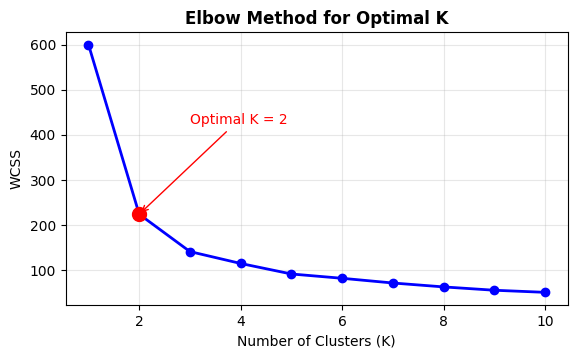

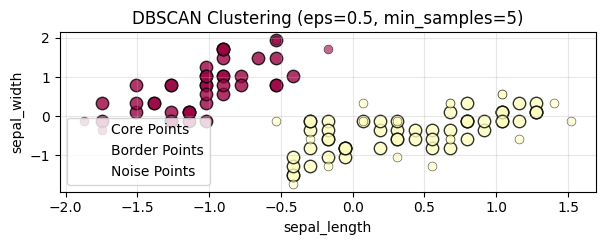

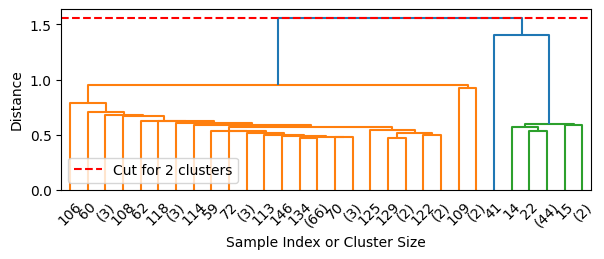

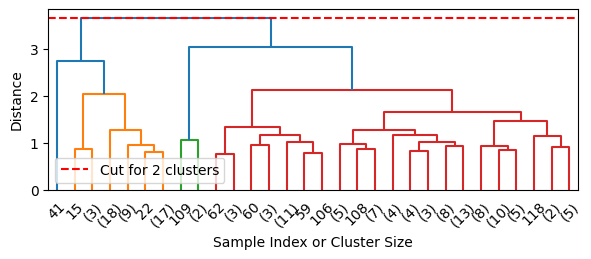

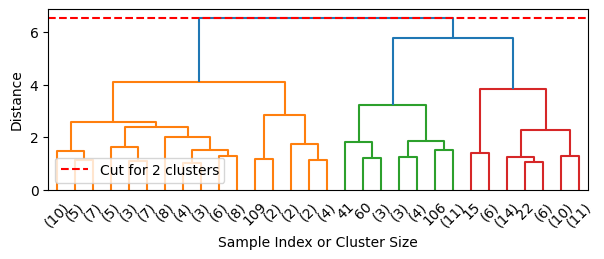

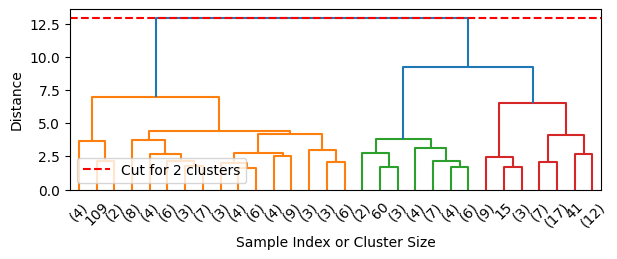

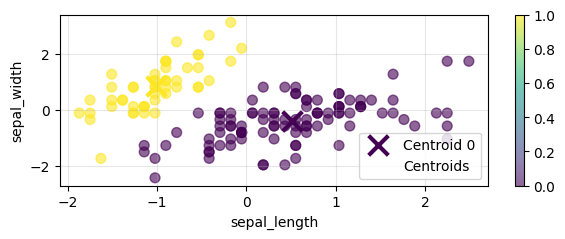

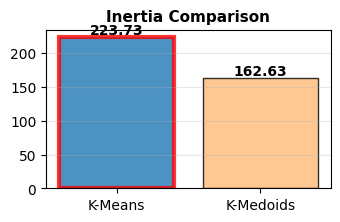

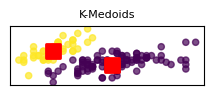

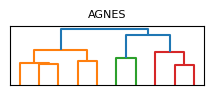

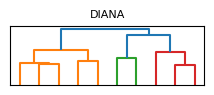

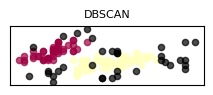

In [30]:
# affichage du GUI
window.mainloop()